In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns= None
pd.options.display.max_rows= None

In [2]:
#import the datasets
app= pd.read_csv(r"D:\data science Projeect\EDA ON  BANK LOAN DEFAULTER\application_data.csv (1)\application_data.csv")
prev_app= pd.read_csv(r"D:\data science Projeect\EDA ON  BANK LOAN DEFAULTER\previous_application.csv\previous_application.csv")

In [3]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# **Features Selection**

In [4]:
#to view list of columns names
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app.shape # Here 307511 is rows number and 122 is columns number.app.shape[0]gives row count and app.shape[1]gives column count

(307511, 122)

In [6]:
# To check the missing values and the proportion of the rows in which the missing values is present in the columns
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
#sort the values
app.isnull().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [8]:
# Put it into a dataframe
msng_info=pd.DataFrame(app.isnull().sum().sort_values())
msng_info

0
SK_ID_CURR                         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_2                    0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
NAME_HOUSING_TYPE                  0
CNT_CHILDREN                       0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
REGION_RATING_CLIENT               0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
AMT_INCOME_TOTAL                   0
FLAG_OWN_REALTY                    0
CODE_GENDER                        0
NAME_CONTRACT_TYPE                 0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
TARGET                             0
FLAG_EMAIL                         0
FLAG_OWN_CAR                       0
AMT_CREDIT                         0
DAYS_LAST_PHONE_CHANGE             1
CNT_FAM_MEMBERS                    2
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
EXT_SOURCE_2                     660
DEF_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
NAME_TYPE_SUITE                 1292
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
EXT_SOURCE_3                   60965
OCCUPATION_TYPE                96391
EMERGENCYSTATE_MODE           145755
TOTALAREA_MODE                148431
YEARS_BEGINEXPLUATATION_MODE  150007
YEARS_BEGINEXPLUATATION_AVG   150007
YEARS_BEGINEXPLUATATION_MEDI  150007
FLOORSMAX_AVG                 153020
FLOORSMAX_MEDI                153020
FLOORSMAX_MODE                153020
HOUSETYPE_MODE                154297
LIVINGAREA_AVG                154350
LIVINGAREA_MODE               154350
LIVINGAREA_MEDI               154350
ENTRANCES_AVG                 154828
ENTRANCES_MODE                154828
ENTRANCES_MEDI                154828
APARTMENTS_MEDI               156061
APARTMENTS_AVG                156061
APARTMENTS_MODE               156061
WALLSMATERIAL_MODE            156341
ELEVATORS_MEDI                163891
ELEVATORS_AVG                 163891
ELEVATORS_MODE                163891
NONLIVINGAREA_MODE            169682
NONLIVINGAREA_AVG             169682
NONLIVINGAREA_MEDI            169682
EXT_SOURCE_1                  173378
BASEMENTAREA_MODE             179943
BASEMENTAREA_AVG              179943
BASEMENTAREA_MEDI             179943
LANDAREA_MEDI                 182590
LANDAREA_AVG                  182590
LANDAREA_MODE                 182590
OWN_CAR_AGE                   202929
YEARS_BUILD_MODE              204488
YEARS_BUILD_AVG               204488
YE

In [9]:
# Put column name
msng_info=pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info

index       0
0                      SK_ID_CURR       0
1         HOUR_APPR_PROCESS_START       0
2      REG_REGION_NOT_WORK_REGION       0
3     LIVE_REGION_NOT_WORK_REGION       0
4          REG_CITY_NOT_LIVE_CITY       0
5          REG_CITY_NOT_WORK_CITY       0
6         LIVE_CITY_NOT_WORK_CITY       0
7               ORGANIZATION_TYPE       0
8                FLAG_DOCUMENT_21       0
9                FLAG_DOCUMENT_20       0
10               FLAG_DOCUMENT_19       0
11               FLAG_DOCUMENT_18       0
12               FLAG_DOCUMENT_17       0
13               FLAG_DOCUMENT_16       0
14               FLAG_DOCUMENT_15       0
15               FLAG_DOCUMENT_14       0
16               FLAG_DOCUMENT_13       0
17               FLAG_DOCUMENT_12       0
18               FLAG_DOCUMENT_11       0
19               FLAG_DOCUMENT_10       0
20                FLAG_DOCUMENT_9       0
21                FLAG_DOCUMENT_8       0
22                FLAG_DOCUMENT_7       0
23                FLAG_DOCUMENT_6       0
24                FLAG_DOCUMENT_5       0
25                FLAG_DOCUMENT_4       0
26                FLAG_DOCUMENT_3       0
27                FLAG_DOCUMENT_2       0
28     WEEKDAY_APPR_PROCESS_START       0
29    REGION_RATING_CLIENT_W_CITY       0
30     REG_REGION_NOT_LIVE_REGION       0
31              NAME_HOUSING_TYPE       0
32                   CNT_CHILDREN       0
33               NAME_INCOME_TYPE       0
34            NAME_EDUCATION_TYPE       0
35             NAME_FAMILY_STATUS       0
36           REGION_RATING_CLIENT       0
37     REGION_POPULATION_RELATIVE       0
38                     DAYS_BIRTH       0
39                  DAYS_EMPLOYED       0
40              DAYS_REGISTRATION       0
41                DAYS_ID_PUBLISH       0
42               AMT_INCOME_TOTAL       0
43                FLAG_OWN_REALTY       0
44                    CODE_GENDER       0
45             NAME_CONTRACT_TYPE       0
46                     FLAG_MOBIL       0
47                 FLAG_EMP_PHONE       0
48                FLAG_WORK_PHONE       0
49               FLAG_CONT_MOBILE       0
50                     FLAG_PHONE       0
51                         TARGET       0
52                     FLAG_EMAIL       0
53                   FLAG_OWN_CAR       0
54                     AMT_CREDIT       0
55         DAYS_LAST_PHONE_CHANGE       1
56                CNT_FAM_MEMBERS       2
57                    AMT_ANNUITY      12
58                AMT_GOODS_PRICE     278
59                   EXT_SOURCE_2     660
60       DEF_30_CNT_SOCIAL_CIRCLE    1021
61       DEF_60_CNT_SOCIAL_CIRCLE    1021
62       OBS_60_CNT_SOCIAL_CIRCLE    1021
63       OBS_30_CNT_SOCIAL_CIRCLE    1021
64                NAME_TYPE_SUITE    1292
65     AMT_REQ_CREDIT_BUREAU_HOUR   41519
66      AMT_REQ_CREDIT_BUREAU_DAY   41519
67      AMT_REQ_CREDIT_BUREAU_MON   41519
68     AMT_REQ_CREDIT_BUREAU_WEEK   41519
69     AMT_REQ_CREDIT_BUREAU_YEAR   41519
70      AMT_REQ_CREDIT_BUREAU_QRT   41519
71                   EXT_SOURCE_3   60965
72                OCCUPATION_TYPE   96391
73            EMERGENCYSTATE_MODE  145755
74                 TOTALAREA_MODE  148431
75   YEARS_BEGINEXPLUATATION_MODE  150007
76    YEARS_BEGINEXPLUATATION_AVG  150007
77   YEARS_BEGINEXPLUATATION_MEDI  150007
78                  FLOORSMAX_AVG  153020
79                 FLOORSMAX_MEDI  153020
80                 FLOORSMAX_MODE  153020
81                 HOUSETYPE_MODE  154297
82                 LIVINGAREA_AVG  154350
83                LIVINGAREA_MODE  154350
84                LIVINGAREA_MEDI  154350
85                  ENTRANCES_AVG  154828
86                 ENTRANCES_MODE  154828
87                 ENTRANCES_MEDI  154828
88                APARTMENTS_MEDI  156061
89                 APARTMENTS_AVG  156061
90                APARTMENTS_MODE  156061
91             WALLSMATERIAL_MODE  156341
92                 ELEVATORS_MEDI  163891
93                  ELEVATORS_AVG  163891
94                 ELEVATORS_MODE  163

In [10]:
#Rename column name
msng_info=pd.DataFrame(app.isnull().sum().sort_values()).reset_index()
msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_info

col_name  null_count
0                      SK_ID_CURR           0
1         HOUR_APPR_PROCESS_START           0
2      REG_REGION_NOT_WORK_REGION           0
3     LIVE_REGION_NOT_WORK_REGION           0
4          REG_CITY_NOT_LIVE_CITY           0
5          REG_CITY_NOT_WORK_CITY           0
6         LIVE_CITY_NOT_WORK_CITY           0
7               ORGANIZATION_TYPE           0
8                FLAG_DOCUMENT_21           0
9                FLAG_DOCUMENT_20           0
10               FLAG_DOCUMENT_19           0
11               FLAG_DOCUMENT_18           0
12               FLAG_DOCUMENT_17           0
13               FLAG_DOCUMENT_16           0
14               FLAG_DOCUMENT_15           0
15               FLAG_DOCUMENT_14           0
16               FLAG_DOCUMENT_13           0
17               FLAG_DOCUMENT_12           0
18               FLAG_DOCUMENT_11           0
19               FLAG_DOCUMENT_10           0
20                FLAG_DOCUMENT_9           0
21                FLAG_DOCUMENT_8           0
22                FLAG_DOCUMENT_7           0
23                FLAG_DOCUMENT_6           0
24                FLAG_DOCUMENT_5           0
25                FLAG_DOCUMENT_4           0
26                FLAG_DOCUMENT_3           0
27                FLAG_DOCUMENT_2           0
28     WEEKDAY_APPR_PROCESS_START           0
29    REGION_RATING_CLIENT_W_CITY           0
30     REG_REGION_NOT_LIVE_REGION           0
31              NAME_HOUSING_TYPE           0
32                   CNT_CHILDREN           0
33               NAME_INCOME_TYPE           0
34            NAME_EDUCATION_TYPE           0
35             NAME_FAMILY_STATUS           0
36           REGION_RATING_CLIENT           0
37     REGION_POPULATION_RELATIVE           0
38                     DAYS_BIRTH           0
39                  DAYS_EMPLOYED           0
40              DAYS_REGISTRATION           0
41                DAYS_ID_PUBLISH           0
42               AMT_INCOME_TOTAL           0
43                FLAG_OWN_REALTY           0
44                    CODE_GENDER           0
45             NAME_CONTRACT_TYPE           0
46                     FLAG_MOBIL           0
47                 FLAG_EMP_PHONE           0
48                FLAG_WORK_PHONE           0
49               FLAG_CONT_MOBILE           0
50                     FLAG_PHONE           0
51                         TARGET           0
52                     FLAG_EMAIL           0
53                   FLAG_OWN_CAR           0
54                     AMT_CREDIT           0
55         DAYS_LAST_PHONE_CHANGE           1
56                CNT_FAM_MEMBERS           2
57                    AMT_ANNUITY          12
58                AMT_GOODS_PRICE         278
59                   EXT_SOURCE_2         660
60       DEF_30_CNT_SOCIAL_CIRCLE        1021
61       DEF_60_CNT_SOCIAL_CIRCLE        1021
62       OBS_60_CNT_SOCIAL_CIRCLE        1021
63       OBS_30_CNT_SOCIAL_CIRCLE        1021
64                NAME_TYPE_SUITE        1292
65     AMT_REQ_CREDIT_BUREAU_HOUR       41519
66      AMT_REQ_CREDIT_BUREAU_DAY       41519
67      AMT_REQ_CREDIT_BUREAU_MON       41519
68     AMT_REQ_CREDIT_BUREAU_WEEK       41519
69     AMT_REQ_CREDIT_BUREAU_YEAR       41519
70      AMT_REQ_CREDIT_BUREAU_QRT       41519
71                   EXT_SOURCE_3       60965
72                OCCUPATION_TYPE       96391
73            EMERGENCYSTATE_MODE      145755
74                 TOTALAREA_MODE      148431
75   YEARS_BEGINEXPLUATATION_MODE      150007
76    YEARS_BEGINEXPLUATATION_AVG      150007
77   YEARS_BEGINEXPLUATATION_MEDI      150007
78                  FLOORSMAX_AVG      153020
79                 FLOORSMAX_MEDI      153020
80                 FLOORSMAX_MODE      153020
81                 HOUSETYPE_MODE      154297
82                 LIVINGAREA_AVG      154350
83                LIVINGAREA_MODE      154350
84                LIVINGAREA_MEDI      154350
85                  ENTRANCES_AVG      154828
86                 ENTR

In [11]:
msng_info['msng_pct'] = msng_info['null_count']/app.shape[0]*100 #to find percentage of missing values, calculate by using formula, [number of null count in each column divided by total number of rows in the datasets]*100
msng_info

col_name  null_count   msng_pct
0                      SK_ID_CURR           0   0.000000
1         HOUR_APPR_PROCESS_START           0   0.000000
2      REG_REGION_NOT_WORK_REGION           0   0.000000
3     LIVE_REGION_NOT_WORK_REGION           0   0.000000
4          REG_CITY_NOT_LIVE_CITY           0   0.000000
5          REG_CITY_NOT_WORK_CITY           0   0.000000
6         LIVE_CITY_NOT_WORK_CITY           0   0.000000
7               ORGANIZATION_TYPE           0   0.000000
8                FLAG_DOCUMENT_21           0   0.000000
9                FLAG_DOCUMENT_20           0   0.000000
10               FLAG_DOCUMENT_19           0   0.000000
11               FLAG_DOCUMENT_18           0   0.000000
12               FLAG_DOCUMENT_17           0   0.000000
13               FLAG_DOCUMENT_16           0   0.000000
14               FLAG_DOCUMENT_15           0   0.000000
15               FLAG_DOCUMENT_14           0   0.000000
16               FLAG_DOCUMENT_13           0   0.000000
17               FLAG_DOCUMENT_12           0   0.000000
18               FLAG_DOCUMENT_11           0   0.000000
19               FLAG_DOCUMENT_10           0   0.000000
20                FLAG_DOCUMENT_9           0   0.000000
21                FLAG_DOCUMENT_8           0   0.000000
22                FLAG_DOCUMENT_7           0   0.000000
23                FLAG_DOCUMENT_6           0   0.000000
24                FLAG_DOCUMENT_5           0   0.000000
25                FLAG_DOCUMENT_4           0   0.000000
26                FLAG_DOCUMENT_3           0   0.000000
27                FLAG_DOCUMENT_2           0   0.000000
28     WEEKDAY_APPR_PROCESS_START           0   0.000000
29    REGION_RATING_CLIENT_W_CITY           0   0.000000
30     REG_REGION_NOT_LIVE_REGION           0   0.000000
31              NAME_HOUSING_TYPE           0   0.000000
32                   CNT_CHILDREN           0   0.000000
33               NAME_INCOME_TYPE           0   0.000000
34            NAME_EDUCATION_TYPE           0   0.000000
35             NAME_FAMILY_STATUS           0   0.000000
36           REGION_RATING_CLIENT           0   0.000000
37     REGION_POPULATION_RELATIVE           0   0.000000
38                     DAYS_BIRTH           0   0.000000
39                  DAYS_EMPLOYED           0   0.000000
40              DAYS_REGISTRATION           0   0.000000
41                DAYS_ID_PUBLISH           0   0.000000
42               AMT_INCOME_TOTAL           0   0.000000
43                FLAG_OWN_REALTY           0   0.000000
44                    CODE_GENDER           0   0.000000
45             NAME_CONTRACT_TYPE           0   0.000000
46                     FLAG_MOBIL           0   0.000000
47                 FLAG_EMP_PHONE           0   0.000000
48                FLAG_WORK_PHONE           0   0.000000
49               FLAG_CONT_MOBILE           0   0.000000
50                     FLAG_PHONE           0   0.000000
51                         TARGET           0   0.000000
52                     FLAG_EMAIL           0   0.000000
53                   FLAG_OWN_CAR           0   0.000000
54                     AMT_CREDIT           0   0.000000
55         DAYS_LAST_PHONE_CHANGE           1   0.000325
56                CNT_FAM_MEMBERS           2   0.000650
57                    AMT_ANNUITY          12   0.003902
58                AMT_GOODS_PRICE         278   0.090403
59                   EXT_SOURCE_2         660   0.214626
60       DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021
61       DEF_60_CNT_SOCIAL_CIRCLE        1021   0.332021
62       OBS_60_CNT_SOCIAL_CIRCLE        1021   0.332021
63       OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
64                NAME_TYPE_SUITE        1292   0.420148
65     AMT_REQ_CREDIT_BUREAU_HOUR       41519  13.501631
66      AMT_REQ_CREDIT_BUREAU_DAY       41519  13.501631
67      AMT_REQ_CREDIT_BUREAU_MON       41519  13.501631
68     AMT_REQ_CREDIT_BUREAU_WEEK       41519  13.501631
69     AMT_REQ_CREDIT_BUREAU_YEAR  

In [12]:
#export the data into excel so we donot need to scroll it again and again
msng_info.to_excel(r"D:\data science Projeect\EDA ON  BANK LOAN DEFAULTER\missing_info.xlsx", index=False)
msng_info.head()

col_name  null_count  msng_pct
0                   SK_ID_CURR           0       0.0
1      HOUR_APPR_PROCESS_START           0       0.0
2   REG_REGION_NOT_WORK_REGION           0       0.0
3  LIVE_REGION_NOT_WORK_REGION           0       0.0
4       REG_CITY_NOT_LIVE_CITY           0       0.0

In [13]:
#filter the columns having missing values morethan equal to 40
msng_info[msng_info['msng_pct']>=40]
#create a separate dataframe and remove all those columns having missing values more than equal to  40
#app_msng_rmvd=app.drop()

col_name  null_count   msng_pct
73            EMERGENCYSTATE_MODE      145755  47.398304
74                 TOTALAREA_MODE      148431  48.268517
75   YEARS_BEGINEXPLUATATION_MODE      150007  48.781019
76    YEARS_BEGINEXPLUATATION_AVG      150007  48.781019
77   YEARS_BEGINEXPLUATATION_MEDI      150007  48.781019
78                  FLOORSMAX_AVG      153020  49.760822
79                 FLOORSMAX_MEDI      153020  49.760822
80                 FLOORSMAX_MODE      153020  49.760822
81                 HOUSETYPE_MODE      154297  50.176091
82                 LIVINGAREA_AVG      154350  50.193326
83                LIVINGAREA_MODE      154350  50.193326
84                LIVINGAREA_MEDI      154350  50.193326
85                  ENTRANCES_AVG      154828  50.348768
86                 ENTRANCES_MODE      154828  50.348768
87                 ENTRANCES_MEDI      154828  50.348768
88                APARTMENTS_MEDI      156061  50.749729
89                 APARTMENTS_AVG      156061  50.749729
90                APARTMENTS_MODE      156061  50.749729
91             WALLSMATERIAL_MODE      156341  50.840783
92                 ELEVATORS_MEDI      163891  53.295980
93                  ELEVATORS_AVG      163891  53.295980
94                 ELEVATORS_MODE      163891  53.295980
95             NONLIVINGAREA_MODE      169682  55.179164
96              NONLIVINGAREA_AVG      169682  55.179164
97             NONLIVINGAREA_MEDI      169682  55.179164
98                   EXT_SOURCE_1      173378  56.381073
99              BASEMENTAREA_MODE      179943  58.515956
100              BASEMENTAREA_AVG      179943  58.515956
101             BASEMENTAREA_MEDI      179943  58.515956
102                 LANDAREA_MEDI      182590  59.376738
103                  LANDAREA_AVG      182590  59.376738
104                 LANDAREA_MODE      182590  59.376738
105                   OWN_CAR_AGE      202929  65.990810
106              YEARS_BUILD_MODE      204488  66.497784
107               YEARS_BUILD_AVG      204488  66.497784
108              YEARS_BUILD_MEDI      204488  66.497784
109                 FLOORSMIN_AVG      208642  67.848630
110                FLOORSMIN_MODE      208642  67.848630
111                FLOORSMIN_MEDI      208642  67.848630
112          LIVINGAPARTMENTS_AVG      210199  68.354953
113         LIVINGAPARTMENTS_MODE      210199  68.354953
114         LIVINGAPARTMENTS_MEDI      210199  68.354953
115            FONDKAPREMONT_MODE      210295  68.386172
116       NONLIVINGAPARTMENTS_AVG      213514  69.432963
117      NONLIVINGAPARTMENTS_MEDI      213514  69.432963
118      NONLIVINGAPARTMENTS_MODE      213514  69.432963
119               COMMONAREA_MODE      214865  69.872297
120                COMMONAREA_AVG      214865  69.872297
121               COMMONAREA_MEDI      214865  69.872297

In [14]:
#filter the columns having missing values more than equal to 40
#we only required col_name column
msng_info[msng_info['msng_pct']>=40]['col_name']
#create a separate dataframe and remove all those columns having missing values more than equal to  40
#app_msng_rmvd=app.drop()

73              EMERGENCYSTATE_MODE
74                   TOTALAREA_MODE
75     YEARS_BEGINEXPLUATATION_MODE
76      YEARS_BEGINEXPLUATATION_AVG
77     YEARS_BEGINEXPLUATATION_MEDI
78                    FLOORSMAX_AVG
79                   FLOORSMAX_MEDI
80                   FLOORSMAX_MODE
81                   HOUSETYPE_MODE
82                   LIVINGAREA_AVG
83                  LIVINGAREA_MODE
84                  LIVINGAREA_MEDI
85                    ENTRANCES_AVG
86                   ENTRANCES_MODE
87                   ENTRANCES_MEDI
88                  APARTMENTS_MEDI
89                   APARTMENTS_AVG
90                  APARTMENTS_MODE
91               WALLSMATERIAL_MODE
92                   ELEVATORS_MEDI
93                    ELEVATORS_AVG
94                   ELEVATORS_MODE
95               NONLIVINGAREA_MODE
96                NONLIVINGAREA_AVG
97               NONLIVINGAREA_MEDI
98                     EXT_SOURCE_1
99                BASEMENTAREA_MODE
100                BASEMENTA

In [15]:
#here col_name column is in series we need to convert it into list
msng_col= msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
msng_col

#create a separate dataframe and remove all those columns having missing values more than equal to  40
#app_msng_rmvd=app.drop()

['EMERGENCYSTATE_MODE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'HOUSETYPE_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'EXT_SOURCE_1',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'OWN_CAR_AGE',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'COMMON

In [16]:
#number of columns containing missing values more than equal to 40 percent
len(msng_col)

49

In [17]:
#here col_name column is in series we need to convert it into list
msng_col= msng_info[msng_info['msng_pct']>=40]['col_name'].to_list()
msng_col

#create a separate dataframe and remove all those columns having missing values more than equal to  40 and drop all these columns
app_msng_rmvd=app.drop(labels=msng_col,axis=1)

In [18]:
#checking the shape of the dataframe
app_msng_rmvd.shape # After dropping all those columns having missing values more than and equal to 40 precent only 73 columns remains

(307511, 73)

In [19]:
app_msng_rmvd.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [20]:
flag_col=[]
for col in app_msng_rmvd.columns:
    if col.startswith("FLAG"):
        flag_col.append(col)

flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [21]:
#let us calculate the number of FLAG columns
len(flag_col)

28

In [22]:
#lets explore the data in these flag columns
app_msng_rmvd[flag_col].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [23]:
#Now apart from Flag columns lets have the Target column as well
app_msng_rmvd[flag_col+['TARGET']].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0

In [24]:
#Lets store it in a seperate dataframe
flag_tgt_col=app_msng_rmvd[flag_col+['TARGET']]
#Lets see top 5 Rows by using head function
flag_tgt_col.head()



FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0

<Axes: xlabel='FLAG_DOCUMENT_19', ylabel='count'>

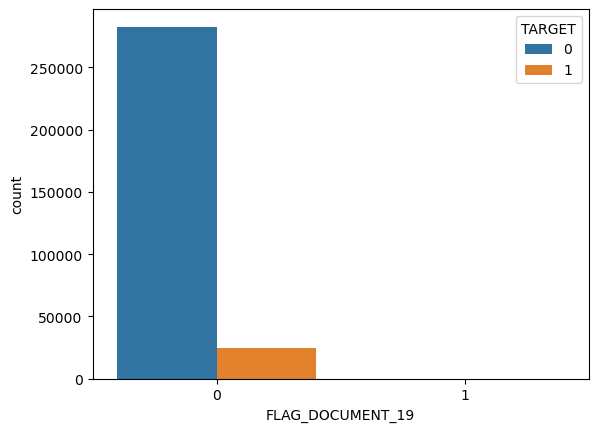

In [25]:
#lets findout the distribution of flag column with respect to target column
sns.countplot(data=flag_tgt_col,x='FLAG_DOCUMENT_19',hue='TARGET') # Here 0 (blue color) represents non-defaulter and 1(brown color) represents defaulter in Target with coreesponds to  FLAG_DOCUMENT_19 columns.So we conclude those customer who have not submitted FLAG_DOCUMENT_19 most of them are non defaulter.

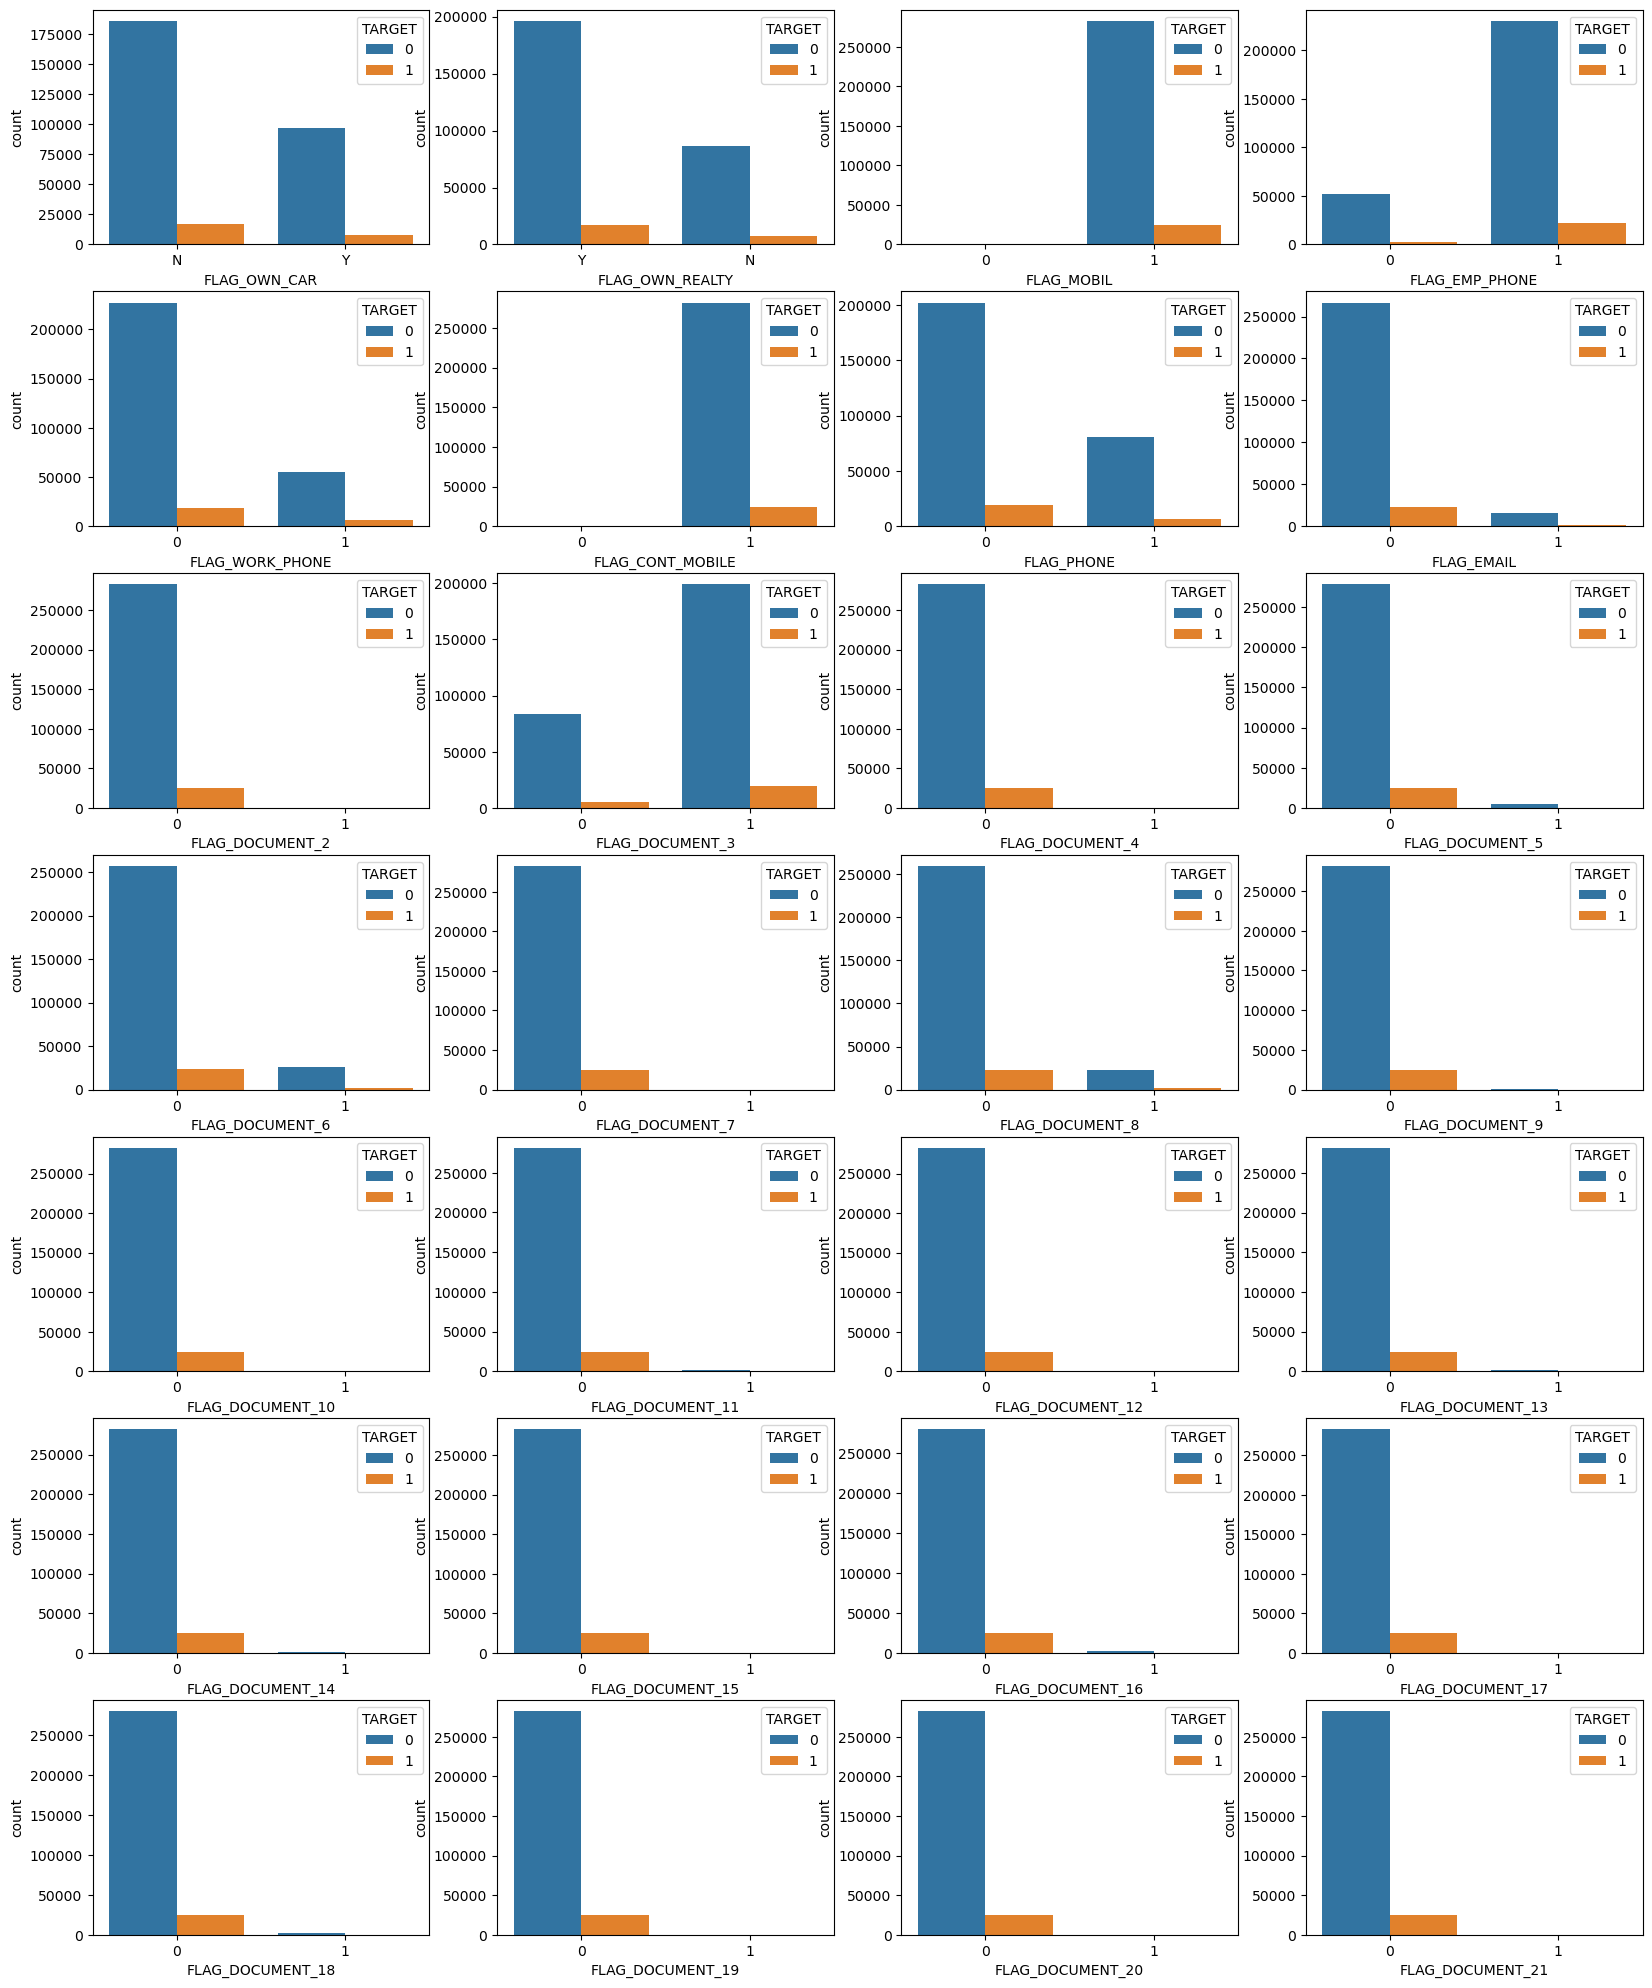

In [26]:
#lets plot all the flag column present in the dataset with respect to Target column
plt.figure(figsize=(20,25))
for i,col in enumerate (flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flag_tgt_col,x=col,hue='TARGET')
    

In [27]:
flg_corr =['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
            'FLAG_PHONE','FLAG_EMAIL','TARGET']
flg_corr

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'TARGET']

In [28]:
flag_corr_df=app_msng_rmvd[flg_corr]
flag_corr_df.head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  TARGET  
0                 1           1           0       1  
1                 1           1           0       0  
2                 1           1           0       0  
3                 1           0           0       0  
4                 1           0           0       0

In [29]:
#plot a heatmap
#corr_df=round(flag_corr_df.corr(),2)
#plt.figure(figsize=(10,5))
#sns.heatmap(corr_df,cmap='coolwarm', linewidths=0.5,annot=True)

In [30]:
#As we can see FLAG_OWN_CAR and FLAG_OWN_REALTY column are not seen in above heatmap
flg_corr =['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
            'FLAG_PHONE','FLAG_EMAIL','TARGET']
flag_corr_df=app_msng_rmvd[flg_corr]

In [31]:
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [32]:
flag_corr_df.groupby(['FLAG_OWN_REALTY']).size()

FLAG_OWN_REALTY
N     94199
Y    213312
dtype: int64

In [33]:
""""Convert the categorical data present in FLAG_OWN_CAR and FLAG_OWN_REALTY columns into numerical columns
using replace function in panda. """
flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_corr_df['FLAG_OWN_REALTY']=flag_corr_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\1594886186.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\1594886186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR']=flag_corr_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\1594886186.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be 

In [34]:
#CHECK WHETHER ITS DONE CORRECTLY OR NOT
flag_corr_df.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

In [35]:
#CHECK WHETHER ITS DONE CORRECTLY OR NOT
flag_corr_df.groupby(['FLAG_OWN_REALTY']).size()

FLAG_OWN_REALTY
0     94199
1    213312
dtype: int64

<Axes: >

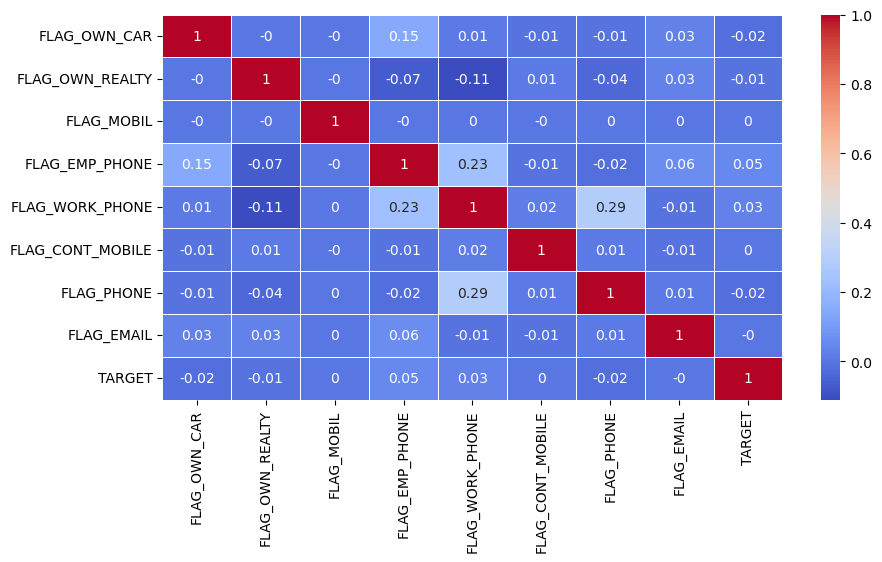

In [36]:
#Now again plot a heatmap to check the correlation of all the colums present in flag_corr dataframe with the target variable
corr_df=round(flag_corr_df.corr(),2)
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,cmap='coolwarm', linewidths=0.5,annot=True)

In [37]:
""""As we can see from the above Heatmap that the correlation between the columns present in the flag_corr dataframe 
with the Target column are very poor, that's why we will drop all these columns as well as all flag document columns."""
app_flag_rmvd=app_msng_rmvd.drop(labels=flag_col,axis=1)
app_flag_rmvd.shape #here we are left with 45 columns

(307511, 45)

In [38]:
app_flag_rmvd.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3               

In [39]:
"""In EXT_SOURCE_2 and EXT_SOURCE_3 columns the null/missing values are less. so lets check its correlation 
with the target variables if the correlation is not good then we will drop these two columns as well. """
round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2)

EXT_SOURCE_2  EXT_SOURCE_3  TARGET
EXT_SOURCE_2          1.00          0.11   -0.16
EXT_SOURCE_3          0.11          1.00   -0.18
TARGET               -0.16         -0.18    1.00

<Axes: >

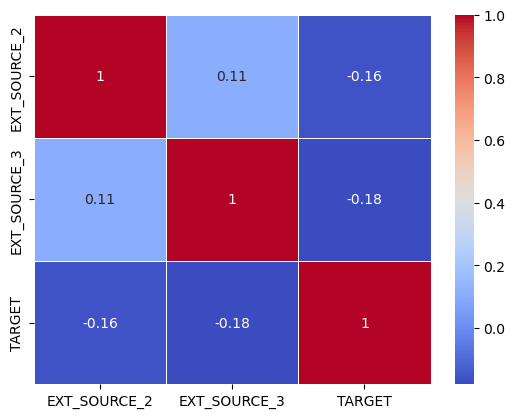

In [40]:
#lets plot a heatmap
sns.heatmap(round(app_flag_rmvd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm', linewidths=0.5,annot=True)

In [41]:
app_score_col_rmvd=app_flag_rmvd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
app_score_col_rmvd.shape

(307511, 43)

Till now we have removed all the columns which have either containing missing valuse more than or equal to 40 percent or have weak correlation with the target variables.

Feature Engineering

Missing Value

In [42]:
#check the missing value present in each column
app_score_col_rmvd.isnull().sum().sort_values()

SK_ID_CURR                         0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
DAYS_ID_PUBLISH                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_RATING_CLIENT               0
NAME_HOUSING_TYPE                  0
TARGET                             0
NAME_CONTRACT_TYPE                 0
REGION_POPULATION_RELATIVE         0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
CODE_GENDER                        0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
D

In [43]:
#lets convert the missing values into percentage
app_score_col_rmvd.isnull().sum().sort_values()/app_score_col_rmvd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [44]:
"""DAYS_LAST_PHONE_CHANGE has missing values only 1 or 0.000003 precent missing value which is very less, so, 
we are ignoring it. Also we are not using DAYS_LAST_PHONE_CHANGE column in our analysis. """
#Lets check for CNT_FAM_MEMBERS column
app_score_col_rmvd.groupby('CNT_FAM_MEMBERS').size() #From the output we can observe that most of the family has 2 family member

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [45]:
#lets check the mode of the CNT_FAM_MEMBERS column
app_score_col_rmvd['CNT_FAM_MEMBERS'].mode()
#from the output we can observe that the mode is 2 .so let fill the missing values with 2




0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [46]:
#impute the missing values using Mode imputation method
app_score_col_rmvd['CNT_FAM_MEMBERS']=app_score_col_rmvd['CNT_FAM_MEMBERS'].fillna((app_score_col_rmvd['CNT_FAM_MEMBERS']).mode()[0])

In [47]:
#now again check the missing values in the 'CNT_FAM_MEMBERS' column after mode imputation
app_score_col_rmvd['CNT_FAM_MEMBERS'].isnull().sum()  #From the output we can observe that there is 0 missing values available in the 'CNT_FAM_MEMBERS' column after imputation

0

In [48]:
#lets check for OCCUPATION_TYPE column which is categorical datatype
app_score_col_rmvd.groupby(['OCCUPATION_TYPE']).size()

OCCUPATION_TYPE
Accountants               9813
Cleaning staff            4653
Cooking staff             5946
Core staff               27570
Drivers                  18603
HR staff                   563
High skill tech staff    11380
IT staff                   526
Laborers                 55186
Low-skill Laborers        2093
Managers                 21371
Medicine staff            8537
Private service staff     2652
Realty agents              751
Sales staff              32102
Secretaries               1305
Security staff            6721
Waiters/barmen staff      1348
dtype: int64

In [49]:
#lets sort it
app_score_col_rmvd.groupby(['OCCUPATION_TYPE']).size().sort_values() #From the output we can observethat the highest Occupation type is Laborers which is 55186 

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
dtype: int64

In [50]:
#CHECK THE MODE OF THE COLUMN OCCUPATION_TYPE
app_score_col_rmvd['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [51]:
#we can fill the missing values either with laborers or NAN. so in this case we are using laborers(MODE VALUE) value to fill the missing data in OCCUPATION_TYPE data column.
app_score_col_rmvd['OCCUPATION_TYPE']=app_score_col_rmvd['OCCUPATION_TYPE'].fillna((app_score_col_rmvd['OCCUPATION_TYPE']).mode()[0])

In [52]:
#check the missing values in the column 'OCCUPATION_TYPE', after imputing the missing values  presents in the column  with mode values
app_score_col_rmvd['OCCUPATION_TYPE'].isnull().sum()

0

In [53]:
#lets check for NAME_TYPE_SUITE column which is categorical datatype
app_score_col_rmvd.groupby(['NAME_TYPE_SUITE']).size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64

In [54]:
#lets sort the category present in the NAME_TYPE_SUITE column
app_score_col_rmvd.groupby(['NAME_TYPE_SUITE']).size().sort_values()

NAME_TYPE_SUITE
Group of people       271
Other_A               866
Other_B              1770
Children             3267
Spouse, partner     11370
Family              40149
Unaccompanied      248526
dtype: int64

In [55]:
#lets check the missing values for 'NAME_TYPE_SUITE'  column which is categorical datatype
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

1292

In [56]:
#lets find the mode of the 'NAME_TYPE_SUITE' column 
app_score_col_rmvd['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [57]:
#we can fill the missing values  with mode values. so in this case we are using Unaccompanied (MODE VALUE) value to fill the missing data in NAME_TYPE_SUITE data column.
app_score_col_rmvd['NAME_TYPE_SUITE']=app_score_col_rmvd['NAME_TYPE_SUITE'].fillna((app_score_col_rmvd['NAME_TYPE_SUITE']).mode()[0])

In [58]:
#check the missing values in the column 'NAME_TYPE_SUITE', after imputing the missing values  presents in the column  with mode values
app_score_col_rmvd['NAME_TYPE_SUITE'].isnull().sum()

0

In [59]:
#check the datatype of AMT_ANNUITY
type(app_score_col_rmvd['AMT_ANNUITY']) 

pandas.core.series.Series

In [60]:
#check the datatype of AMT_ANNUITY
(app_score_col_rmvd['AMT_ANNUITY']).dtype #as it is float means numeric datatype

dtype('float64')

In [61]:
#LETS USE DESCRIBE FUNCTION TO CHECK HOW TO IMPUTE THIS COLUMN 'AMT_ANNUITY'
app_score_col_rmvd['AMT_ANNUITY'].describe() #From the output we can see the values varying between median (24903.00) and mean (27108.57)are very less, so in our case we are using mean value for imputing the missing values.

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [62]:
#Filling the missing values present in AMT_ANNUITY column with mean value
app_score_col_rmvd['AMT_ANNUITY']=app_score_col_rmvd['AMT_ANNUITY'].fillna((app_score_col_rmvd['AMT_ANNUITY']).mean())

In [63]:
#check is there any missing values present after imputing it with mean values
app_score_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [64]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].dtype #from the output we can observe that it is float datatype means numerical or continous datatype so using mode values is not suitable

dtype('float64')

In [65]:
#lets use describe function
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].describe() #as the values is score it ideally should not be in decimal

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [66]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [67]:
app_score_col_rmvd['AMT_REQ_CREDIT_BUREAU_HOUR'].unique() #from the output we can see that the unique values are the whole numbers so if we use mean value over here for imputing missing value,it doesnot make sense,  so we will use median value.

array([ 0., nan,  1.,  2.,  3.,  4.])

In [68]:
#As AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR all the columns have same initials and we are trying to impute the missing values in one go. So for that we will get the list of all these variables  
amt_req_col=[]
for col in app_score_col_rmvd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
        amt_req_col.append(col)
amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [69]:
#now impute the missing values using median
for col in amt_req_col:
    app_score_col_rmvd[col]=app_score_col_rmvd[col].fillna((app_score_col_rmvd[col]).median())

In [70]:
#Check if there is a missing values present after imputation
app_score_col_rmvd[col].isnull().sum()

0

In [71]:
#checking whether all the columns presents in the dataset having similar initial names have any missing values after imputing it with median
app_score_col_rmvd.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [72]:
#checking how many missing values are present in AMT_GOODS_PRICE column
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

278

In [73]:
#to find out the statistical value like mean median mode we use describe function
app_score_col_rmvd['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [74]:
#As the above output is not clearly understandable so use agg function to findout min,max, median
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [75]:
#lets calculate mean value
app_score_col_rmvd['AMT_GOODS_PRICE'].mean()


538396.2074288895

In [76]:
#we will take media value to impute the missing values in AMT_GOODS_PRICE column as it is looking more relevant than mean value
app_score_col_rmvd['AMT_GOODS_PRICE']=app_score_col_rmvd['AMT_GOODS_PRICE'].fillna((app_score_col_rmvd['AMT_GOODS_PRICE']).median())

In [77]:
#checking how many missing values are now present in AMT_GOODS_PRICE column after imputing it with median values
app_score_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [78]:
#To check top 5 rows now present in the dataset
app_score_col_rmvd.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   
3  House / apartment                    0.008019      -19005          -3039   
4  House / apartment                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3               

In [79]:
#Cecking the presence of missing values present in theAMT_CREDIT column
app_score_col_rmvd['AMT_CREDIT'].isnull().sum() #from the output it is clear that this column doesnot have any miising values.

0

Value modification

In [80]:
#As the negative values are present in all these DAYS_BIRTH','DAYS_EMPLOYED''DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' columns whose initials are common i.e, DAYS.lets treat these column  by converting its values into positive values in one go.
days_col=[]
for col in app_score_col_rmvd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)
days_col   

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [81]:
#use abs function to convert the negative values present in the columns into the positive values
for col in days_col:
    app_score_col_rmvd[col]=abs(app_score_col_rmvd[col])

In [82]:
app_score_col_rmvd.head()#from the output we can see that all the negative values presented in the columns whose initial were DAYS are now succesfully converted into positive values

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             4260.0             2531        Laborers              1.0   
3             9833.0             2437        Laborers              2.0   
4             4311.0             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3               

# **BINNING**

In [83]:
#lets find how many columns are presently available in our datasets
len(app_score_col_rmvd.columns)

43

In [84]:
#Now checking the datatypes of each column
app_score_col_rmvd.info()#in the output float and int are continuous variable(actual int could be both  categorical or continuous) Object is charachter or categorical variable.So here our main focus would be on float variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [85]:
#lets find the number of unique value in each column
app_score_col_rmvd.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13673
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_N

In [86]:
#lets sort the values
app_score_col_rmvd.nunique().sort_values()#This will gives us understanding whether the variables are discrete variable ( categorical variable) Or continuous variables

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [87]:
#LETS CHECK WHAT SORT OF VALUES THIS PARTICULAR VARIABLE HAVE
app_score_col_rmvd['OBS_30_CNT_SOCIAL_CIRCLE'].unique() #By observing the output we can say that here also we don't need to perform Binning

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

In [88]:
#lets check for AMT_GOODS_PRICE
app_score_col_rmvd['AMT_GOODS_PRICE'].describe() #as the output is not as per the expectation lets use aggregation function

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [89]:
app_score_col_rmvd['AMT_GOODS_PRICE'].agg(['min','max','median']) #since the value of max and median have high differece there might be a chance of the presence of outliers

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

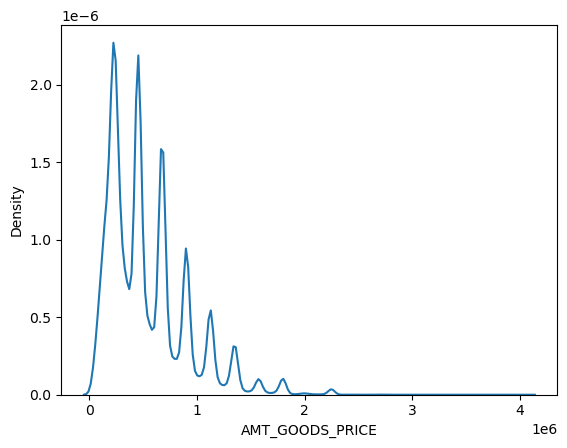

In [90]:
#Lets plot Kernel density estimation plot
sns.kdeplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

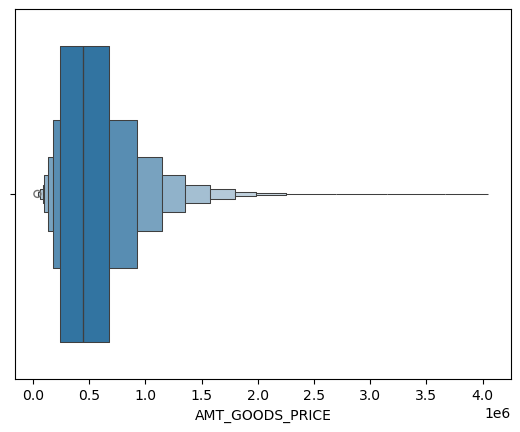

In [91]:
#lets plot boxplot
sns.boxenplot(data=app_score_col_rmvd,x='AMT_GOODS_PRICE')


In [92]:
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) #from the output we can observe that in all the percentile the data is distributed symmetrically except the nineth percentile which has huge variance

0.1     180000.0
0.2     225000.0
0.3     270000.0
0.4     378000.0
0.5     450000.0
0.6     522000.0
0.7     675000.0
0.8     814500.0
0.9    1093500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [93]:
#now lets check for 0.99 percentile
app_score_col_rmvd['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]) #As the max value which we got was 4050000.0 (4.5 million) this is absolutely a outlier as we can see till 0.99 percentile we don't get that value. So we can conclude that most of the values are below one million

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [94]:
#lets create bin for binning
bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','Above 900k']

app_score_col_rmvd['AMT_GOODS_PRICE_RANGE']=pd.cut(app_score_col_rmvd['AMT_GOODS_PRICE'],bins,labels=ranges)

In [95]:
app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\3225432597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_GOODS_PRICE_RANGE']).size()


AMT_GOODS_PRICE_RANGE
0-100k         8709
100k-200k     32956
200k-300k     62761
300k-400k     21219
400k-500k     57251
500k-600k     13117
600k-700k     40024
700k-800k      8110
800k-900k     21484
Above 900k    41880
dtype: int64

In [96]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [97]:
app_score_col_rmvd['AMT_INCOME_TOTAL'].max()

117000000.0

In [98]:
#lets create bin for binning
bins=[0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges=['0-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-350k','350k-400k','Above 400k']

app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE']=pd.cut(app_score_col_rmvd['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [99]:
app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\1909137384.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()


AMT_INCOME_TOTAL_RANGE
0-100k        63698
100k-150k     91591
150k-200k     64307
200k-250k     48137
250k-300k     17039
300k-350k      8874
350k-400k      5802
Above 400k     8063
dtype: int64

In [100]:
app_score_col_rmvd['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [101]:
app_score_col_rmvd['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [102]:
app_score_col_rmvd['AMT_CREDIT'].max()

4050000.0

In [103]:
#lets create bin for binning
bins=[0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
ranges=['0-200k','200k-400k','400k-600k','600k-800k','800k-900k','900k-1M','1M-2M','2M-3M','Above 3M']

app_score_col_rmvd['AMT_CREDIT_RANGE']=pd.cut(app_score_col_rmvd['AMT_CREDIT'],bins,labels=ranges)

In [104]:
app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size() #Essentially, it counts the occurrences of each unique value in AMT_CREDIT_RANGE.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\676672773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_CREDIT_RANGE']).size() #Essentially, it counts the occurrences of each unique value in AMT_CREDIT_RANGE.


AMT_CREDIT_RANGE
0-200k       36144
200k-400k    81151
400k-600k    66270
600k-800k    43242
800k-900k    21792
900k-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [105]:
app_score_col_rmvd['AMT_CREDIT_RANGE'].isnull().sum()

0

In [106]:
app_score_col_rmvd['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [107]:
app_score_col_rmvd['AMT_ANNUITY'].max()

258025.5

In [108]:
#lets create bin for binning
bins=[0,25000,50000,100000,150000,200000,258025.5]
ranges=['0-25k','25K-50K','50k-100k','100k-150k','150k-200k','Above 200K']

app_score_col_rmvd['AMT_ANNUITY_RANGE']=pd.cut(app_score_col_rmvd['AMT_ANNUITY'],bins,labels=ranges)

In [109]:
app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\4067078387.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['AMT_ANNUITY_RANGE']).size()


AMT_ANNUITY_RANGE
0-25k         154867
25K-50K       131347
50k-100k       20792
100k-150k        437
150k-200k         32
Above 200K        36
dtype: int64

In [110]:
app_score_col_rmvd['AMT_ANNUITY_RANGE'].isnull().sum()

0

In [111]:
app_score_col_rmvd['DAYS_EMPLOYED'].agg(['mean','max','median'])

mean       67724.742149
max       365243.000000
median      2219.000000
Name: DAYS_EMPLOYED, dtype: float64

In [112]:
app_score_col_rmvd['DAYS_EMPLOYED'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.81     10913.1
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [113]:
app_score_col_rmvd[app_score_col_rmvd['DAYS_EMPLOYED']<app_score_col_rmvd['DAYS_EMPLOYED'].max()].max()['DAYS_EMPLOYED']

17912

In [114]:
app_score_col_rmvd['DAYS_EMPLOYED'].max()

365243

In [115]:
#lets create bin for binning
bins=[0,1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,23691,365243]
ranges=['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y','50Y-65Y','Above 65Y']

app_score_col_rmvd['DAYS_EMPLOYED_RANGE']=pd.cut(app_score_col_rmvd['DAYS_EMPLOYED'],bins,labels=ranges)

In [116]:
app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\681948328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['DAYS_EMPLOYED_RANGE']).size()


DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
50Y-65Y           0
Above 65Y     55374
dtype: int64

In [117]:
app_score_col_rmvd['DAYS_BIRTH'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.81,0.85,0.9,0.95,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.81    20641.0
0.85    21316.0
0.90    22181.0
0.95    23204.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [118]:
app_score_col_rmvd['DAYS_BIRTH'].min()

7489

In [119]:
#lets create bin for binning
bins=[0,7300,10950,14600,18250,21900,25299]
ranges=['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_score_col_rmvd['DAYS_BIRTH_RANGE']=pd.cut(app_score_col_rmvd['DAYS_BIRTH'],bins,labels=ranges)

In [120]:
app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\3707552931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_score_col_rmvd.groupby(['DAYS_BIRTH_RANGE']).size()


DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

In [121]:
app_score_col_rmvd['DAYS_BIRTH_RANGE'].isnull().sum()

0

DATA ANALYSIS

In [122]:
#lets check out the data types of all the columns present in app_score_col_rmvd dataframe
app_score_col_rmvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [123]:
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [124]:
#lets just focus on object variable as of now
app_score_col_rmvd.select_dtypes(['object']).head()

NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         Cash loans           M   Unaccompanied          Working   
1         Cash loans           F          Family    State servant   
2    Revolving loans           M   Unaccompanied          Working   
3         Cash loans           F   Unaccompanied          Working   
4         Cash loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0        Laborers                  WEDNESDAY  Business Entity Type 3  
1      Core staff                     MONDAY                  School  
2        Laborers                     MONDAY              Government  
3        Laborers                  WEDNESDAY  Business Entity Type 3  
4      Core staff                   THURSDAY                Religion

In [125]:
#lets get the list of the columns
app_score_col_rmvd.select_dtypes(['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [126]:
#lets store it in obj_var
obj_var= app_score_col_rmvd.select_dtypes(['object']).columns
obj_var #in the output we got all the columns which are categorical(object are also categorical) in nature.

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [127]:
app_score_col_rmvd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

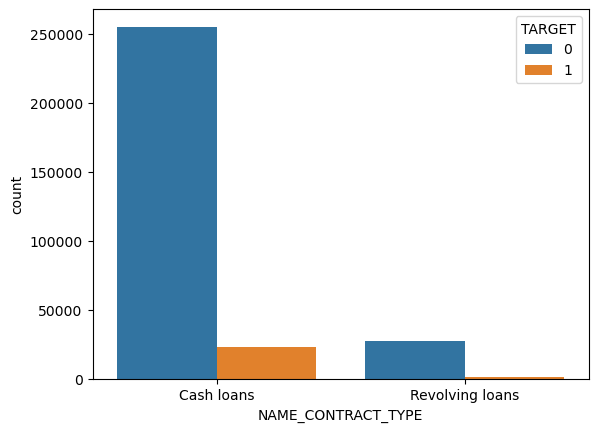

In [128]:
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [129]:
#lets get the percentage of customer of cash loan and revolving loans as defaulter and non defaulter
data_pct=app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE']).mean().sort_values(by='TARGET',ascending=False) #the output shows the percentage of defaulters in each loan type present in NAME_CONTRACT_TYPE column.

In [130]:
data_pct

TARGET
NAME_CONTRACT_TYPE          
Cash loans          0.083459
Revolving loans     0.054783

In [131]:
#use the parameter as_index
data_pct=app_score_col_rmvd[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean()

In [132]:
data_pct

NAME_CONTRACT_TYPE    TARGET
0         Cash loans  0.083459
1    Revolving loans  0.054783

In [133]:
#lets convert the data interms of percentage
data_pct['PCT']=data_pct['TARGET']*100

In [134]:
data_pct

NAME_CONTRACT_TYPE    TARGET       PCT
0         Cash loans  0.083459  8.345913
1    Revolving loans  0.054783  5.478329

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

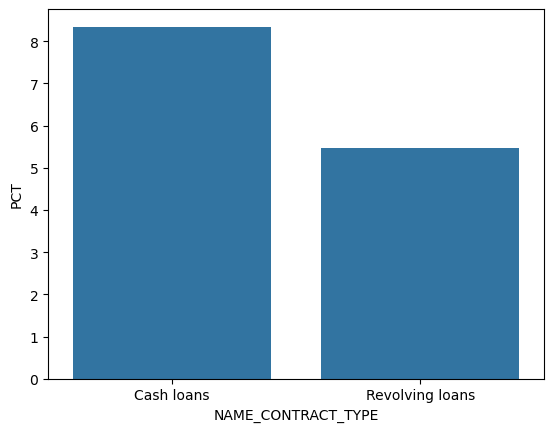

In [135]:
#lets draw barplot on this basis on this
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

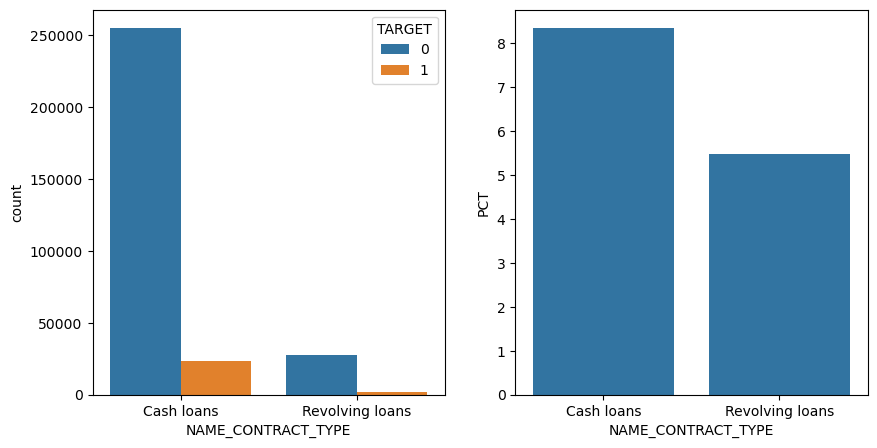

In [136]:
#Lets plot both the graph side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=app_score_col_rmvd,x='NAME_CONTRACT_TYPE',hue='TARGET')
plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')

From the graph we can say that most of the clients have opted for cash loans and they are less likely to be defaulter.

In [137]:
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [138]:
len(obj_var) #Find the number of columns having object datatypes so as to perform dataanalysis on each one of them

10

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\3632943341.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\3632943341.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\3632943341.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\3632943341.py:14: F

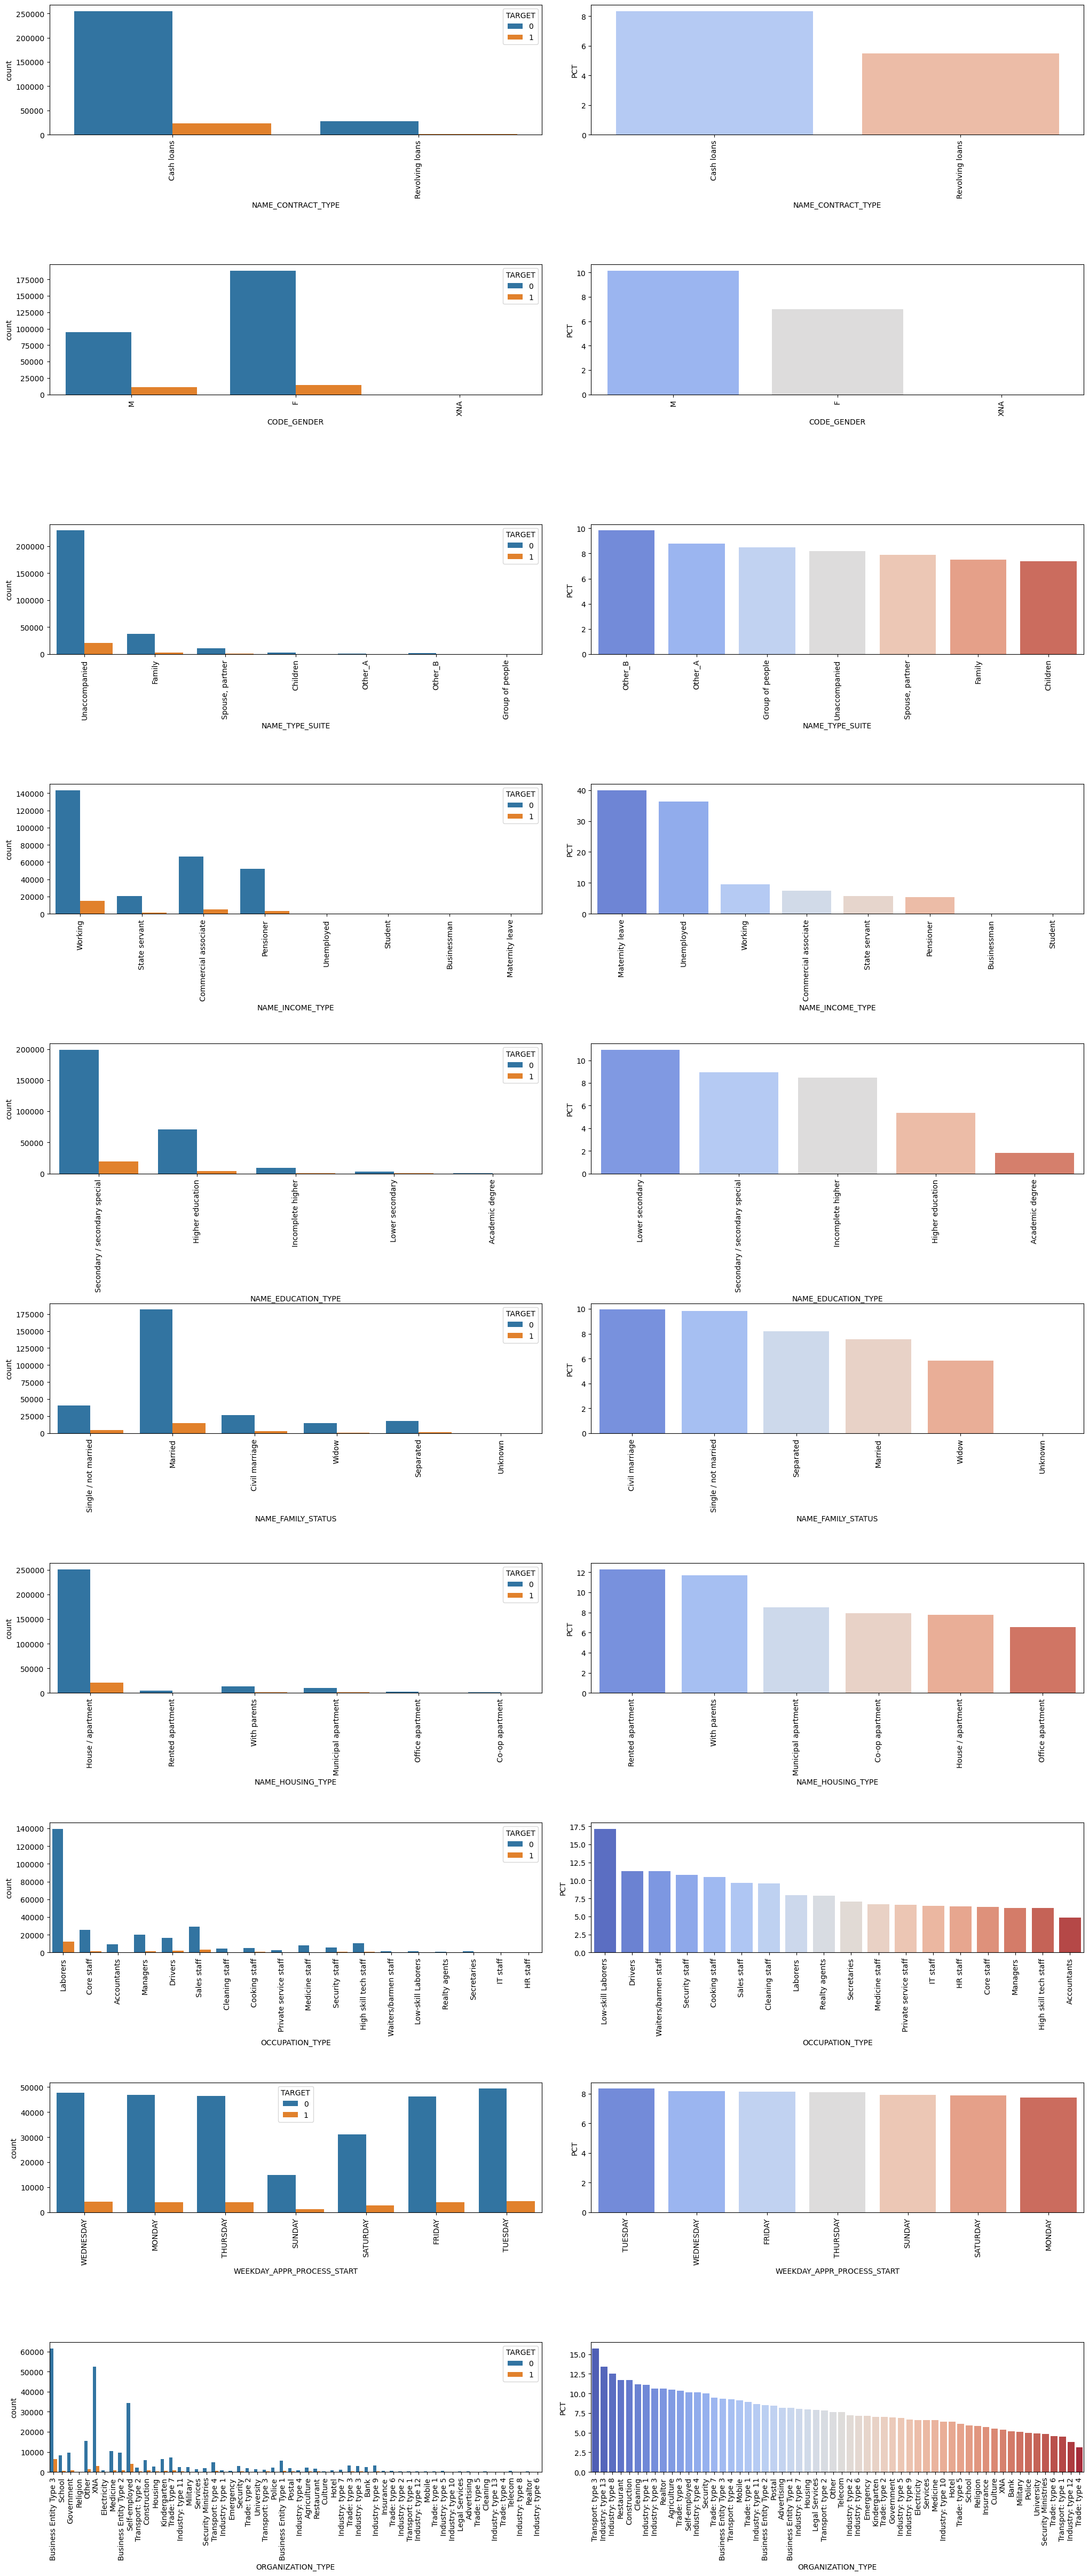

In [139]:
#lets plot graph for other columns as well 
plt.figure(figsize=(25,60))
for i, var in enumerate(obj_var):

    data_pct=app_score_col_rmvd[[var,'TARGET']].groupby([var],as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT']=data_pct['TARGET']*100
    
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=app_score_col_rmvd,x=var,hue='TARGET')
    plt.xticks(rotation=90)
    
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

In [140]:
#lets again check the data types
app_score_col_rmvd.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64


In [141]:
#Summary of the datatypes
app_score_col_rmvd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [142]:
#lets make a list of numeric variable
num_var = app_score_col_rmvd.select_dtypes(include=['float64','int64']).columns
num_cat_var = app_score_col_rmvd.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

33

In [143]:
app_score_col_rmvd[num_var].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637             3648.0             2120              1.0   
1           1188             1186.0              291              2.0   
2            225             4260.0             2531              1.0   
3           3039             9833.0             2437              2.0   
4           3038             4311.0             3458              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       0                        0                       2.0   
1                       0                        0                       1.0   
2                       0                        0                       0.0   
3                       0                        0                       2.0   
4                       1                        1                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0           

In [144]:
#out of the data frame app_score_col_rmvd we make two subset data frame
num_data=app_score_col_rmvd[num_var]
num_data.head() #lets create two subset of this data. one that has only defaulters and other witn non defaulter.This is important because the dataset is imbalance where the percent of defaulter data is only 8%. 

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637             3648.0             2120              1.0   
1           1188             1186.0              291              2.0   
2            225             4260.0             2531              1.0   
3           3039             9833.0             2437              2.0   
4           3038             4311.0             3458              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       0                        0                       2.0   
1                       0                        0                       1.0   
2                       0                        0                       0.0   
3                       0                        0                       2.0   
4                       1                        1                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0           

In [145]:
num_data.groupby(['TARGET']).size() #We can observe that the data sets are higly imbalanced

TARGET
0    282686
1     24825
dtype: int64

In [146]:
num_data.groupby(['TARGET']).size()/num_data.shape[0]*100 #output shows the percentage of defaulters and non defaulters.

TARGET
0    91.927118
1     8.072882
dtype: float64

In [147]:
#now create two subset, one subset will only have defaulters and one will have only non-defaulters
defaulters= num_data[num_data['TARGET']==1].drop(['TARGET'],axis=1)
defaulters.head() #from the output we can observe that Target column only have defaulters value

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       100002             0          202500.0    406597.5      24700.5   
26      100031             0          112500.0    979992.0      27076.5   
40      100047             0          202500.0   1193580.0      35028.0   
42      100049             0          135000.0    288873.0      16258.5   
81      100096             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          351000.0                    0.018801        9461            637   
26         702000.0                    0.018029       18724           2628   
40         855000.0                    0.025164       17482           1262   
42         238500.0                    0.007305       13384           3597   
81         252000.0                    0.028663       24794         365243   

    DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0              3648.0             2120              1.0                     2   
26             6573.0             1827              1.0                     3   
40             1182.0             1029              2.0                     2   
42               45.0             4409              2.0                     3   
81             5391.0             4199              2.0                     2   

    REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                             2                       10   
26                            2                        9   
40                            2                        9   
42                            3                       11   
81                            2                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
81                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
0                        0                        0                       2.0   
26                       0                        0                      10.0   
40                       0                        0                       0.0   
42                       0                        0                       1.0   
81                       0                        0                       1.0   

    DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                        2.0                       2.0   
26                       1.0                      10.0   
40                       0.0                       0.0   
42                       0.0                       1.0   
81                       1.0                       1.0   

    DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                        2.0                  1134.0   
26                       0.0                   161.0   
40                       0.0                  1075.0   
42                       0.0                  1480.0   
81                       1.0                     0.0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0

In [148]:
#another subset for non_defaulters
repayers= num_data[num_data['TARGET']==0].drop(['TARGET'],axis=1)
repayers.head() #from the output we can observe that Target column only have non-defaulters value

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1        1129500.0                    0.003541       16765           1188   
2         135000.0                    0.010032       19046            225   
3         297000.0                    0.008019       19005           3039   
4         513000.0                    0.028663       19932           3038   
5         454500.0                    0.035792       16941           1588   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1             1186.0              291              2.0                     1   
2             4260.0             2531              1.0                     2   
3             9833.0             2437              2.0                     2   
4             4311.0             3458              1.0                     2   
5             4970.0              477              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   
5                            2                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
1                       0                        0                       1.0   
2                       0                        0                       0.0   
3                       0                        0                       2.0   
4                       1                        1                       0.0   
5                       0                        0                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   
5                       0.0                  2536.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WE

In [149]:
#lets find the correlation of top 10 highly numeric variables for both defaulters and repayers
defaulters.corr()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                     1.000000     -0.005144         -0.010165   
CNT_CHILDREN                  -0.005144      1.000000          0.004796   
AMT_INCOME_TOTAL              -0.010165      0.004796          1.000000   
AMT_CREDIT                    -0.001290     -0.001675          0.038131   
AMT_ANNUITY                   -0.007578      0.031257          0.046421   
AMT_GOODS_PRICE               -0.001814     -0.008111          0.037591   
REGION_POPULATION_RELATIVE     0.006301     -0.031975          0.009135   
DAYS_BIRTH                     0.001254     -0.259109         -0.003096   
DAYS_EMPLOYED                 -0.005161     -0.192864         -0.014977   
DAYS_REGISTRATION             -0.006342     -0.149154         -0.000158   
DAYS_ID_PUBLISH                0.002539      0.032299          0.004215   
CNT_FAM_MEMBERS               -0.003816      0.885484          0.006654   
REGION_RATING_CLIENT          -0.005936      0.040680         -0.021486   
REGION_RATING_CLIENT_W_CITY   -0.004135      0.043185         -0.022808   
HOUR_APPR_PROCESS_START        0.005004     -0.023899          0.013775   
REG_REGION_NOT_LIVE_REGION    -0.004249     -0.024322          0.007577   
REG_REGION_NOT_WORK_REGION     0.004120     -0.020793          0.014531   
LIVE_REGION_NOT_WORK_REGION    0.004303     -0.012073          0.013409   
REG_CITY_NOT_LIVE_CITY         0.008328     -0.001174         -0.002223   
REG_CITY_NOT_WORK_CITY         0.000787      0.046115         -0.003019   
LIVE_CITY_NOT_WORK_CITY       -0.002929      0.053515         -0.001353   
OBS_30_CNT_SOCIAL_CIRCLE      -0.009395      0.025804         -0.004709   
DEF_30_CNT_SOCIAL_CIRCLE      -0.005549      0.001448         -0.005186   
OBS_60_CNT_SOCIAL_CIRCLE      -0.009058      0.025180         -0.004616   
DEF_60_CNT_SOCIAL_CIRCLE      -0.009428     -0.005106         -0.004866   
DAYS_LAST_PHONE_CHANGE        -0.002455     -0.011547          0.002429   
AMT_REQ_CREDIT_BUREAU_HOUR    -0.011106      0.000316          0.001079   
AMT_REQ_CREDIT_BUREAU_DAY     -0.007388     -0.011255          0.000135   
AMT_REQ_CREDIT_BUREAU_WEEK    -0.003075     -0.009316          0.000941   
AMT_REQ_CREDIT_BUREAU_MON      0.005180     -0.008852          0.005718   
AMT_REQ_CREDIT_BUREAU_QRT     -0.001614     -0.013029          0.001037   
AMT_REQ_CREDIT_BUREAU_YEAR     0.006843     -0.027253          0.004516   

                             AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    -0.001290    -0.007578        -0.001814   
CNT_CHILDREN                  -0.001675     0.031257        -0.008111   
AMT_INCOME_TOTAL               0.038131     0.046421         0.037591   
AMT_CREDIT                     1.000000     0.752195         0.982783   
AMT_ANNUITY                    0.752195     1.000000         0.752295   
AMT_GOODS_PRICE                0.982783     0.752295         1.000000   
REGION_POPULATION_RELATIVE     0.069161     0.071690         0.076053   
DAYS_BIRTH                     0.135316     0.014303         0.135738   
DAYS_EMPLOYED                  0.001930    -0.081207         0.006648   
DAYS_REGISTRATION              0.025854    -0.034279         0.025661   
DAYS_ID_PUBLISH                0.052329     0.016767         0.056061   
CNT_FAM_MEMBERS                0.051224     0.075711         0.047367   
REGION_RATING_CLIENT          -0.059193    -0.073784        -0.066367   
REGION_RATING_CLIENT_W_CITY   -0.071377    -0.089291        -0.077170   
HOUR_APPR_PROCESS_START        0.031782     0.031236         0.044302   
REG_REGION_NOT_LIVE_REGION     0.019540     0.034807         0.022406   
REG_REGION_NOT_WORK_REGION     0.033260     0.066565         0.036285   
LIVE_REGION_NOT_WORK_REGION    0.033554     0.064109         0.035505   
REG_CITY_NOT_LIVE_CITY        -0.033034    -0.005745        -0.034085   
REG_CITY_NOT_WORK_CITY        -0.037720     0.001997        -0.038915   
LIVE_CITY_NOT_WORK_C

In [150]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr() #from the output we can  observe that there is formation of two triangles (upper triangle and lower triangle)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL
SK_ID_CURR          1.000000     -0.005144         -0.010165
CNT_CHILDREN       -0.005144      1.000000          0.004796
AMT_INCOME_TOTAL   -0.010165      0.004796          1.000000

In [151]:
defaulter_corr=defaulters.corr()
np.ones(defaulter_corr.shape)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [152]:
#We need to grab the upper triangle only
np.triu(np.ones(defaulter_corr.shape), k=1) # by putting k=1, lower triangle equals to 0 and upper triangle equals to 1

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [153]:
import numpy as np
np.bool = np.bool_

In [154]:
#wherever there is 0 we convert into False and wherever there is 1 we convert into True
np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [155]:
defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool))

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                          NaN     -0.005144         -0.010165   
CNT_CHILDREN                        NaN           NaN          0.004796   
AMT_INCOME_TOTAL                    NaN           NaN               NaN   
AMT_CREDIT                          NaN           NaN               NaN   
AMT_ANNUITY                         NaN           NaN               NaN   
AMT_GOODS_PRICE                     NaN           NaN               NaN   
REGION_POPULATION_RELATIVE          NaN           NaN               NaN   
DAYS_BIRTH                          NaN           NaN               NaN   
DAYS_EMPLOYED                       NaN           NaN               NaN   
DAYS_REGISTRATION                   NaN           NaN               NaN   
DAYS_ID_PUBLISH                     NaN           NaN               NaN   
CNT_FAM_MEMBERS                     NaN           NaN               NaN   
REGION_RATING_CLIENT                NaN           NaN               NaN   
REGION_RATING_CLIENT_W_CITY         NaN           NaN               NaN   
HOUR_APPR_PROCESS_START             NaN           NaN               NaN   
REG_REGION_NOT_LIVE_REGION          NaN           NaN               NaN   
REG_REGION_NOT_WORK_REGION          NaN           NaN               NaN   
LIVE_REGION_NOT_WORK_REGION         NaN           NaN               NaN   
REG_CITY_NOT_LIVE_CITY              NaN           NaN               NaN   
REG_CITY_NOT_WORK_CITY              NaN           NaN               NaN   
LIVE_CITY_NOT_WORK_CITY             NaN           NaN               NaN   
OBS_30_CNT_SOCIAL_CIRCLE            NaN           NaN               NaN   
DEF_30_CNT_SOCIAL_CIRCLE            NaN           NaN               NaN   
OBS_60_CNT_SOCIAL_CIRCLE            NaN           NaN               NaN   
DEF_60_CNT_SOCIAL_CIRCLE            NaN           NaN               NaN   
DAYS_LAST_PHONE_CHANGE              NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_HOUR          NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_DAY           NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_WEEK          NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_MON           NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_QRT           NaN           NaN               NaN   
AMT_REQ_CREDIT_BUREAU_YEAR          NaN           NaN               NaN   

                             AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    -0.001290    -0.007578        -0.001814   
CNT_CHILDREN                  -0.001675     0.031257        -0.008111   
AMT_INCOME_TOTAL               0.038131     0.046421         0.037591   
AMT_CREDIT                          NaN     0.752195         0.982783   
AMT_ANNUITY                         NaN          NaN         0.752295   
AMT_GOODS_PRICE                     NaN          NaN              NaN   
REGION_POPULATION_RELATIVE          NaN          NaN              NaN   
DAYS_BIRTH                          NaN          NaN              NaN   
DAYS_EMPLOYED                       NaN          NaN              NaN   
DAYS_REGISTRATION                   NaN          NaN              NaN   
DAYS_ID_PUBLISH                     NaN          NaN              NaN   
CNT_FAM_MEMBERS                     NaN          NaN              NaN   
REGION_RATING_CLIENT                NaN          NaN              NaN   
REGION_RATING_CLIENT_W_CITY         NaN          NaN              NaN   
HOUR_APPR_PROCESS_START             NaN          NaN              NaN   
REG_REGION_NOT_LIVE_REGION          NaN          NaN              NaN   
REG_REGION_NOT_WORK_REGION          NaN          NaN              NaN   
LIVE_REGION_NOT_WORK_REGION         NaN          NaN              NaN   
REG_CITY_NOT_LIVE_CITY              NaN          NaN              NaN   
REG_CITY_NOT_WORK_CITY              NaN          NaN              NaN   
LIVE_CITY_NOT_WORK_C

In [156]:
defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack()

SK_ID_CURR                   SK_ID_CURR                          NaN
                             CNT_CHILDREN                        NaN
                             AMT_INCOME_TOTAL                    NaN
                             AMT_CREDIT                          NaN
                             AMT_ANNUITY                         NaN
                             AMT_GOODS_PRICE                     NaN
                             REGION_POPULATION_RELATIVE          NaN
                             DAYS_BIRTH                          NaN
                             DAYS_EMPLOYED                       NaN
                             DAYS_REGISTRATION                   NaN
                             DAYS_ID_PUBLISH                     NaN
                             CNT_FAM_MEMBERS                     NaN
                             REGION_RATING_CLIENT                NaN
                             REGION_RATING_CLIENT_W_CITY         NaN
                             HOUR_

In [157]:
defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack().reset_index()

level_0                      level_1         0
0                      SK_ID_CURR                   SK_ID_CURR       NaN
1                      SK_ID_CURR                 CNT_CHILDREN       NaN
2                      SK_ID_CURR             AMT_INCOME_TOTAL       NaN
3                      SK_ID_CURR                   AMT_CREDIT       NaN
4                      SK_ID_CURR                  AMT_ANNUITY       NaN
5                      SK_ID_CURR              AMT_GOODS_PRICE       NaN
6                      SK_ID_CURR   REGION_POPULATION_RELATIVE       NaN
7                      SK_ID_CURR                   DAYS_BIRTH       NaN
8                      SK_ID_CURR                DAYS_EMPLOYED       NaN
9                      SK_ID_CURR            DAYS_REGISTRATION       NaN
10                     SK_ID_CURR              DAYS_ID_PUBLISH       NaN
11                     SK_ID_CURR              CNT_FAM_MEMBERS       NaN
12                     SK_ID_CURR         REGION_RATING_CLIENT       NaN
13                     SK_ID_CURR  REGION_RATING_CLIENT_W_CITY       NaN
14                     SK_ID_CURR      HOUR_APPR_PROCESS_START       NaN
15                     SK_ID_CURR   REG_REGION_NOT_LIVE_REGION       NaN
16                     SK_ID_CURR   REG_REGION_NOT_WORK_REGION       NaN
17                     SK_ID_CURR  LIVE_REGION_NOT_WORK_REGION       NaN
18                     SK_ID_CURR       REG_CITY_NOT_LIVE_CITY       NaN
19                     SK_ID_CURR       REG_CITY_NOT_WORK_CITY       NaN
20                     SK_ID_CURR      LIVE_CITY_NOT_WORK_CITY       NaN
21                     SK_ID_CURR     OBS_30_CNT_SOCIAL_CIRCLE       NaN
22                     SK_ID_CURR     DEF_30_CNT_SOCIAL_CIRCLE       NaN
23                     SK_ID_CURR     OBS_60_CNT_SOCIAL_CIRCLE       NaN
24                     SK_ID_CURR     DEF_60_CNT_SOCIAL_CIRCLE       NaN
25                     SK_ID_CURR       DAYS_LAST_PHONE_CHANGE       NaN
26                     SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_HOUR       NaN
27                     SK_ID_CURR    AMT_REQ_CREDIT_BUREAU_DAY       NaN
28                     SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_WEEK       NaN
29                     SK_ID_CURR    AMT_REQ_CREDIT_BUREAU_MON       NaN
30                     SK_ID_CURR    AMT_REQ_CREDIT_BUREAU_QRT       NaN
31                     SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_YEAR       NaN
32                   CNT_CHILDREN                   SK_ID_CURR -0.005144
33                   CNT_CHILDREN                 CNT_CHILDREN       NaN
34                   CNT_CHILDREN             AMT_INCOME_TOTAL       NaN
35                   CNT_CHILDREN                   AMT_CREDIT       NaN
36                   CNT_CHILDREN                  AMT_ANNUITY       NaN
37                   CNT_CHILDREN              AMT_GOODS_PRICE       NaN
38                   CNT_CHILDREN   REGION_POPULATION_RELATIVE       NaN
39                   CNT_CHILDREN                   DAYS_BIRTH       NaN
40                   CNT_CHILDREN                DAYS_EMPLOYED       NaN
41                   CNT_CHILDREN            DAYS_REGISTRATION       NaN
42                   CNT_CHILDREN              DAYS_ID_PUBLISH       NaN
43                   CNT_CHILDREN              CNT_FAM_MEMBERS       NaN
44                   CNT_CHILDREN         REGION_RATING_CLIENT       NaN
45                   CNT_CHILDREN  REGION_RATING_CLIENT_W_CITY       NaN
46                   CNT_CHILDREN      HOUR_APPR_PROCESS_START       NaN
47                   CNT_CHILDREN   REG_REGION_NOT_LIVE_REGION       NaN
48                   CNT_CHILDREN   REG_REGION_NOT_WORK_REGION       NaN
49                   CNT_CHILDREN  LIVE_REGION_NOT_WORK_REGION       NaN
50                   CNT_CHILDREN       REG_CITY_NOT_LIVE_CITY       NaN
51                   CNT_CHILDREN       REG_CITY_NOT_WORK_CITY       NaN
52                   CNT_CHILDREN      LIVE_CITY_NOT_WORK_CITY       NaN
53                   CNT_CHILDREN     OBS_30_CNT_SOCIAL_CIRCLE       NaN
54         

In [158]:
#change the column name
defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var_1',
                                                                                                                          'level_1':'var_2', 0:'corr'})

var_1                        var_2      corr
0                      SK_ID_CURR                   SK_ID_CURR       NaN
1                      SK_ID_CURR                 CNT_CHILDREN       NaN
2                      SK_ID_CURR             AMT_INCOME_TOTAL       NaN
3                      SK_ID_CURR                   AMT_CREDIT       NaN
4                      SK_ID_CURR                  AMT_ANNUITY       NaN
5                      SK_ID_CURR              AMT_GOODS_PRICE       NaN
6                      SK_ID_CURR   REGION_POPULATION_RELATIVE       NaN
7                      SK_ID_CURR                   DAYS_BIRTH       NaN
8                      SK_ID_CURR                DAYS_EMPLOYED       NaN
9                      SK_ID_CURR            DAYS_REGISTRATION       NaN
10                     SK_ID_CURR              DAYS_ID_PUBLISH       NaN
11                     SK_ID_CURR              CNT_FAM_MEMBERS       NaN
12                     SK_ID_CURR         REGION_RATING_CLIENT       NaN
13                     SK_ID_CURR  REGION_RATING_CLIENT_W_CITY       NaN
14                     SK_ID_CURR      HOUR_APPR_PROCESS_START       NaN
15                     SK_ID_CURR   REG_REGION_NOT_LIVE_REGION       NaN
16                     SK_ID_CURR   REG_REGION_NOT_WORK_REGION       NaN
17                     SK_ID_CURR  LIVE_REGION_NOT_WORK_REGION       NaN
18                     SK_ID_CURR       REG_CITY_NOT_LIVE_CITY       NaN
19                     SK_ID_CURR       REG_CITY_NOT_WORK_CITY       NaN
20                     SK_ID_CURR      LIVE_CITY_NOT_WORK_CITY       NaN
21                     SK_ID_CURR     OBS_30_CNT_SOCIAL_CIRCLE       NaN
22                     SK_ID_CURR     DEF_30_CNT_SOCIAL_CIRCLE       NaN
23                     SK_ID_CURR     OBS_60_CNT_SOCIAL_CIRCLE       NaN
24                     SK_ID_CURR     DEF_60_CNT_SOCIAL_CIRCLE       NaN
25                     SK_ID_CURR       DAYS_LAST_PHONE_CHANGE       NaN
26                     SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_HOUR       NaN
27                     SK_ID_CURR    AMT_REQ_CREDIT_BUREAU_DAY       NaN
28                     SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_WEEK       NaN
29                     SK_ID_CURR    AMT_REQ_CREDIT_BUREAU_MON       NaN
30                     SK_ID_CURR    AMT_REQ_CREDIT_BUREAU_QRT       NaN
31                     SK_ID_CURR   AMT_REQ_CREDIT_BUREAU_YEAR       NaN
32                   CNT_CHILDREN                   SK_ID_CURR -0.005144
33                   CNT_CHILDREN                 CNT_CHILDREN       NaN
34                   CNT_CHILDREN             AMT_INCOME_TOTAL       NaN
35                   CNT_CHILDREN                   AMT_CREDIT       NaN
36                   CNT_CHILDREN                  AMT_ANNUITY       NaN
37                   CNT_CHILDREN              AMT_GOODS_PRICE       NaN
38                   CNT_CHILDREN   REGION_POPULATION_RELATIVE       NaN
39                   CNT_CHILDREN                   DAYS_BIRTH       NaN
40                   CNT_CHILDREN                DAYS_EMPLOYED       NaN
41                   CNT_CHILDREN            DAYS_REGISTRATION       NaN
42                   CNT_CHILDREN              DAYS_ID_PUBLISH       NaN
43                   CNT_CHILDREN              CNT_FAM_MEMBERS       NaN
44                   CNT_CHILDREN         REGION_RATING_CLIENT       NaN
45                   CNT_CHILDREN  REGION_RATING_CLIENT_W_CITY       NaN
46                   CNT_CHILDREN      HOUR_APPR_PROCESS_START       NaN
47                   CNT_CHILDREN   REG_REGION_NOT_LIVE_REGION       NaN
48                   CNT_CHILDREN   REG_REGION_NOT_WORK_REGION       NaN
49                   CNT_CHILDREN  LIVE_REGION_NOT_WORK_REGION       NaN
50                   CNT_CHILDREN       REG_CITY_NOT_LIVE_CITY       NaN
51                   CNT_CHILDREN       REG_CITY_NOT_WORK_CITY       NaN
52                   CNT_CHILDREN      LIVE_CITY_NOT_WORK_CITY       NaN
53                   CNT_CHILDREN     OBS_30_CNT_SOCIAL_CIRCLE       NaN
54           

In [159]:
#put it in seperate dataframe
defaulter_corr_unstck=defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var_1', 'level_1':'var_2', 0:'corr'})
defaulter_corr_unstck.head()

var_1             var_2  corr
0  SK_ID_CURR        SK_ID_CURR   NaN
1  SK_ID_CURR      CNT_CHILDREN   NaN
2  SK_ID_CURR  AMT_INCOME_TOTAL   NaN
3  SK_ID_CURR        AMT_CREDIT   NaN
4  SK_ID_CURR       AMT_ANNUITY   NaN

In [160]:
defaulter_corr_unstck['corr']=abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.head() #highly correlated variables(it has shown only in top 5 which contains NaN values)

var_1             var_2  corr
0  SK_ID_CURR        SK_ID_CURR   NaN
1  SK_ID_CURR      CNT_CHILDREN   NaN
2  SK_ID_CURR  AMT_INCOME_TOTAL   NaN
3  SK_ID_CURR        AMT_CREDIT   NaN
4  SK_ID_CURR       AMT_ANNUITY   NaN

In [161]:
#lets put not in ascending order
defaulter_corr_unstck['corr']=abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.sort_values(by=['corr'], ascending=False) #the output still have NaN values

var_1                        var_2      corr
757      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE  0.998269
163               AMT_GOODS_PRICE                   AMT_CREDIT  0.982783
428   REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT  0.956637
353               CNT_FAM_MEMBERS                 CNT_CHILDREN  0.885484
790      DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE  0.868994
560   LIVE_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION  0.847885
659       LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY  0.778540
164               AMT_GOODS_PRICE                  AMT_ANNUITY  0.752295
131                   AMT_ANNUITY                   AMT_CREDIT  0.752195
263                 DAYS_EMPLOYED                   DAYS_BIRTH  0.582185
527    REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION  0.497937
626        REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY  0.472052
422   REGION_RATING_CLIENT_W_CITY   REGION_POPULATION_RELATIVE  0.446977
390          REGION_RATING_CLIENT   REGION_POPULATION_RELATIVE  0.443236
758      OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE  0.337181
725      DEF_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE  0.333825
591        REG_CITY_NOT_LIVE_CITY   REG_REGION_NOT_LIVE_REGION  0.322628
460       HOUR_APPR_PROCESS_START         REGION_RATING_CLIENT  0.293908
295             DAYS_REGISTRATION                   DAYS_BIRTH  0.289114
461       HOUR_APPR_PROCESS_START  REGION_RATING_CLIENT_W_CITY  0.275703
791      DEF_60_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE  0.264159
789      DEF_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE  0.261009
225                    DAYS_BIRTH                 CNT_CHILDREN  0.259109
327               DAYS_ID_PUBLISH                   DAYS_BIRTH  0.252863
890     AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_HOUR  0.247511
616        REG_CITY_NOT_WORK_CITY                DAYS_EMPLOYED  0.245827
657       LIVE_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION  0.244071
624        REG_CITY_NOT_WORK_CITY   REG_REGION_NOT_WORK_REGION  0.238676
328               DAYS_ID_PUBLISH                DAYS_EMPLOYED  0.229090
615        REG_CITY_NOT_WORK_CITY                   DAYS_BIRTH  0.215192
359               CNT_FAM_MEMBERS                   DAYS_BIRTH  0.203267
648       LIVE_CITY_NOT_WORK_CITY                DAYS_EMPLOYED  0.198484
656       LIVE_CITY_NOT_WORK_CITY   REG_REGION_NOT_WORK_REGION  0.194724
257                 DAYS_EMPLOYED                 CNT_CHILDREN  0.192864
296             DAYS_REGISTRATION                DAYS_EMPLOYED  0.192455
360               CNT_FAM_MEMBERS                DAYS_EMPLOYED  0.186515
923    AMT_REQ_CREDIT_BUREAU_WEEK    AMT_REQ_CREDIT_BUREAU_DAY  0.185767
625        REG_CITY_NOT_WORK_CITY  LIVE_REGION_NOT_WORK_REGION  0.181182
583        REG_CITY_NOT_LIVE_CITY                   DAYS_BIRTH  0.161858
623        REG_CITY_NOT_WORK_CITY   REG_REGION_NOT_LIVE_REGION  0.151893
289             DAYS_REGISTRATION                 CNT_CHILDREN  0.149154
361               CNT_FAM_MEMBERS            DAYS_REGISTRATION  0.145828
592        REG_CITY_NOT_LIVE_CITY   REG_REGION_NOT_WORK_REGION  0.144726
454       HOUR_APPR_PROCESS_START   REGION_POPULATION_RELATIVE  0.142744
229                    DAYS_BIRTH              AMT_GOODS_PRICE  0.135738
227                    DAYS_BIRTH                   AMT_CREDIT  0.135316
1022   AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_QRT  0.133739
810        DAYS_LAST_PHONE_CHANGE              DAYS_ID_PUBLISH  0.123951
647       LIVE_CITY_NOT_WORK_CITY                   DAYS_BIRTH  0.123623
805        DAYS_LAST_PHONE_CHANGE              AMT_GOODS_PRICE  0.118232
556   LIVE_REGION_NOT_WORK_REGION         REGION_RATING_CLIENT  0.117079
1017   AMT_REQ_CREDIT_BUREAU_YEAR       DAYS_LAST_PHONE_CHANGE  0.114899
557   LIVE_REGION_NOT_WORK_REGION  REGION_RATING_CLIENT_W_CITY  0.111948
807        DAYS_LAST_PHONE_CHANGE                   DAYS_BIRTH  0.111199
803        DA

In [162]:
#drop NaN Values
defaulter_corr_unstck['corr']=abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'], ascending=False).head(10)

var_1                       var_2      corr
757     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE  0.998269
163              AMT_GOODS_PRICE                  AMT_CREDIT  0.982783
428  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.956637
353              CNT_FAM_MEMBERS                CNT_CHILDREN  0.885484
790     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE  0.868994
560  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.847885
659      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.778540
164              AMT_GOODS_PRICE                 AMT_ANNUITY  0.752295
131                  AMT_ANNUITY                  AMT_CREDIT  0.752195
263                DAYS_EMPLOYED                  DAYS_BIRTH  0.582185

In [163]:
repayers_corr=repayers.corr()
repayers_corr_unstck= repayers_corr.where(np.triu(np.ones(defaulter_corr.shape), k=1).astype(np.bool)).unstack().reset_index().rename(columns={'level_0':'var_1', 'level_1':'var_2', 0:'corr'})
repayers_corr_unstck['corr']=abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'], ascending=False).head(10)

var_1                       var_2      corr
757     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE  0.998508
163              AMT_GOODS_PRICE                  AMT_CREDIT  0.987022
428  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.950149
353              CNT_FAM_MEMBERS                CNT_CHILDREN  0.878571
560  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.861861
790     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE  0.859332
659      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.830381
164              AMT_GOODS_PRICE                 AMT_ANNUITY  0.776421
131                  AMT_ANNUITY                  AMT_CREDIT  0.771297
263                DAYS_EMPLOYED                  DAYS_BIRTH  0.626114

In [164]:
#Lets do univariate analysis on numeric data
num_data.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637             3648.0             2120              1.0   
1           1188             1186.0              291              2.0   
2            225             4260.0             2531              1.0   
3           3039             9833.0             2437              2.0   
4           3038             4311.0             3458              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       0                        0                       2.0   
1                       0                        0                       1.0   
2                       0                        0                       0.0   
3                       0                        0                       2.0   
4                       1                        1                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0           

In [165]:
#Doing analysis on all the AMT_VARIABLES i.e,(AMT_INCOME_TOTAL	AMT_CREDIT	AMT_ANNUITY	AMT_GOODS_PRICE)
#lets make a list of all these variables
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

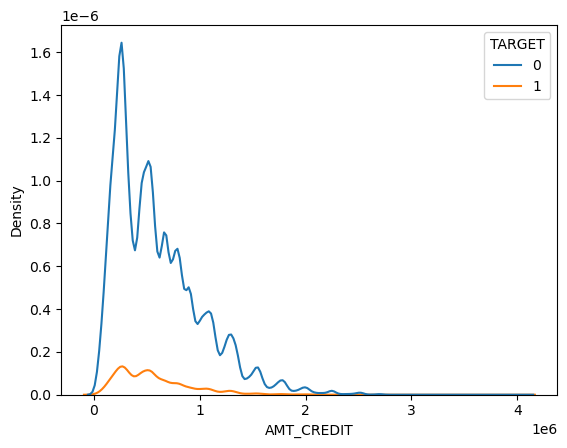

In [166]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')

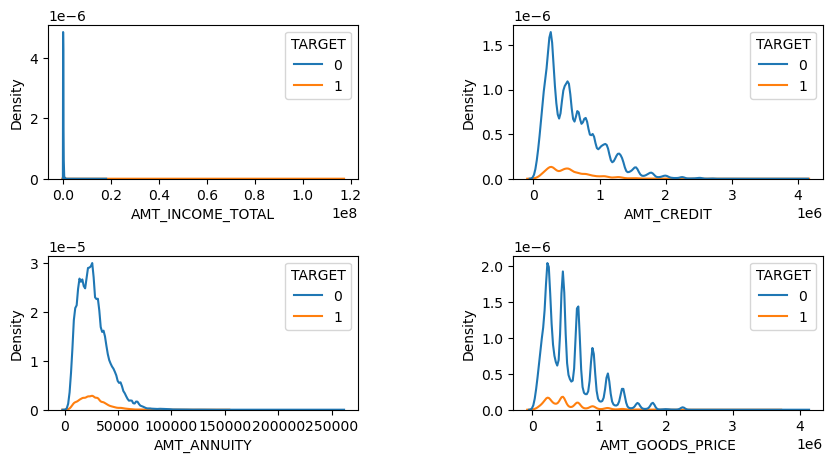

In [167]:
plt.figure(figsize=(10,5))

for i,col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)


In [168]:
#Lets do bivariate Analysis
num_data.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637             3648.0             2120              1.0   
1           1188             1186.0              291              2.0   
2            225             4260.0             2531              1.0   
3           3039             9833.0             2437              2.0   
4           3038             4311.0             3458              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       0                        0                       2.0   
1                       0                        0                       1.0   
2                       0                        0                       0.0   
3                       0                        0                       2.0   
4                       1                        1                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                  1134.0   
1                       0.0                   828.0   
2                       0.0                   815.0   
3                       0.0                   617.0   
4                       0.0                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0           

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

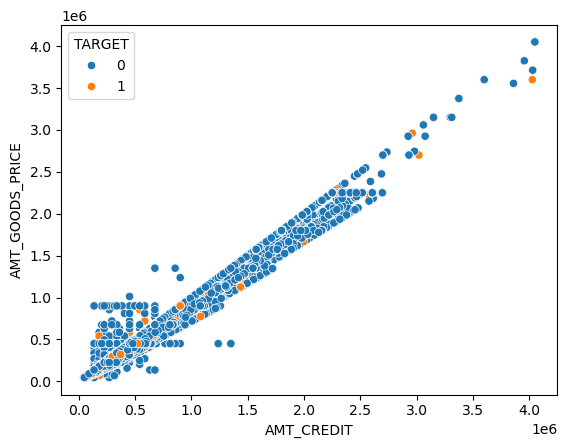

In [169]:
#here also bivariate analysis perfomed on AMT_VARIABLES i.e, AMT_CREDIT and AMT_GOODS_PRICE
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

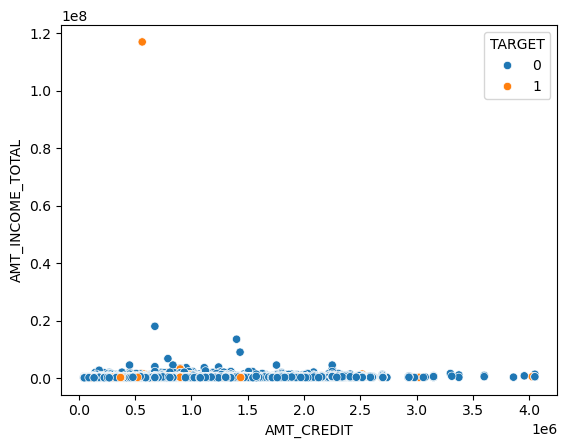

In [170]:
#performing bivariate analysis on  AMT_CREDIT and AMT_INCOME_TOTAL
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

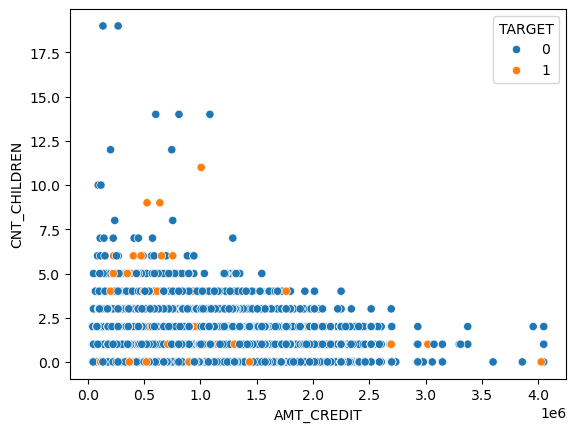

In [171]:
#performing bivariate analysis on  AMT_CREDIT and CNT_CHILDREN
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [172]:
amt_var=num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

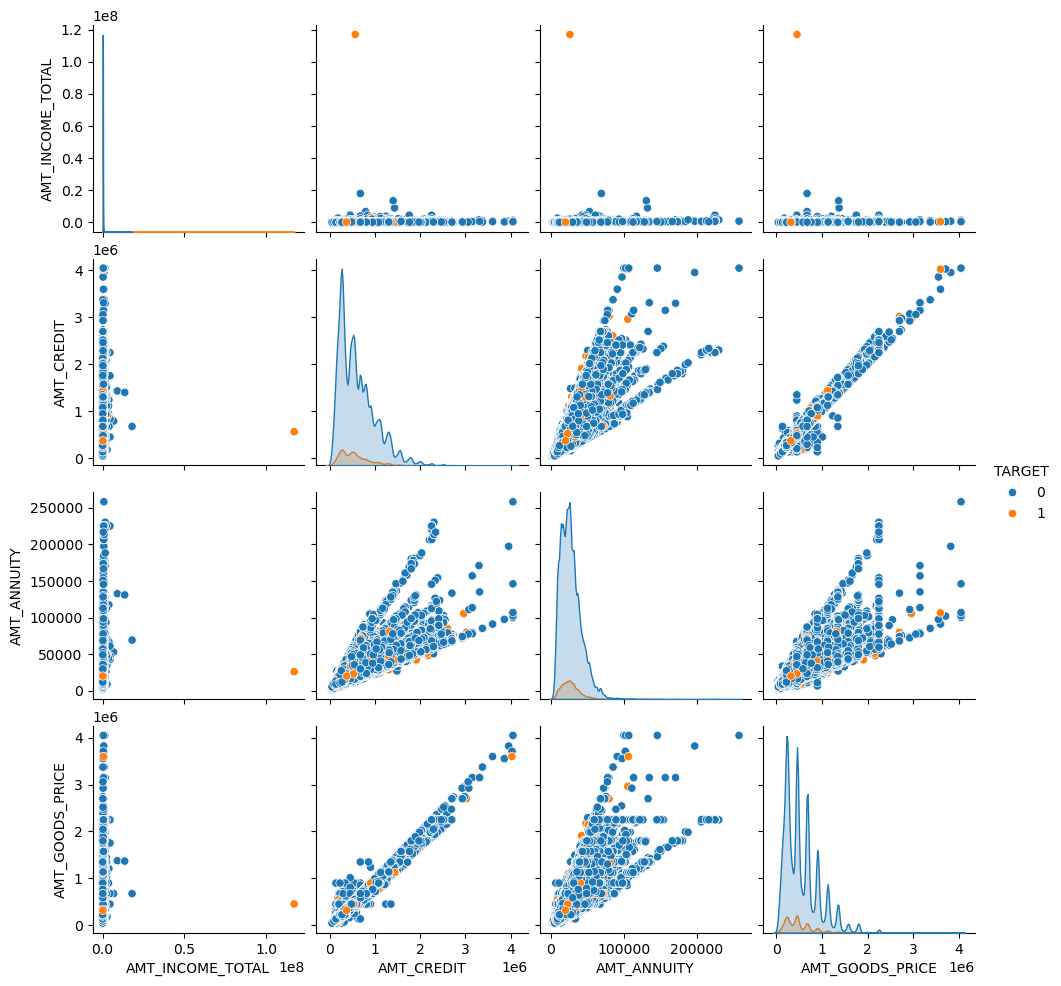

In [173]:
sns.pairplot(data=amt_var,hue='TARGET')

# **Explore previous_application datasets**

In [174]:
len(prev_app.columns)

37

In [175]:
#Explore Missing values in prev_app datasets
null_count=pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})
null_count

var  count_pct
0      RATE_INTEREST_PRIVILEGED  99.643698
1         RATE_INTEREST_PRIMARY  99.643698
2              AMT_DOWN_PAYMENT  53.636480
3             RATE_DOWN_PAYMENT  53.636480
4               NAME_TYPE_SUITE  49.119754
5     NFLAG_INSURED_ON_APPROVAL  40.298129
6              DAYS_TERMINATION  40.298129
7                 DAYS_LAST_DUE  40.298129
8     DAYS_LAST_DUE_1ST_VERSION  40.298129
9                DAYS_FIRST_DUE  40.298129
10           DAYS_FIRST_DRAWING  40.298129
11              AMT_GOODS_PRICE  23.081773
12                  AMT_ANNUITY  22.286665
13                  CNT_PAYMENT  22.286366
14          PRODUCT_COMBINATION   0.020716
15                   AMT_CREDIT   0.000060
16             NAME_YIELD_GROUP   0.000000
17               NAME_PORTFOLIO   0.000000
18         NAME_SELLER_INDUSTRY   0.000000
19             SELLERPLACE_AREA   0.000000
20                 CHANNEL_TYPE   0.000000
21            NAME_PRODUCT_TYPE   0.000000
22                   SK_ID_PREV   0.000000
23          NAME_GOODS_CATEGORY   0.000000
24             NAME_CLIENT_TYPE   0.000000
25           CODE_REJECT_REASON   0.000000
26                   SK_ID_CURR   0.000000
27                DAYS_DECISION   0.000000
28         NAME_CONTRACT_STATUS   0.000000
29       NAME_CASH_LOAN_PURPOSE   0.000000
30       NFLAG_LAST_APPL_IN_DAY   0.000000
31  FLAG_LAST_APPL_PER_CONTRACT   0.000000
32      HOUR_APPR_PROCESS_START   0.000000
33   WEEKDAY_APPR_PROCESS_START   0.000000
34              AMT_APPLICATION   0.000000
35           NAME_CONTRACT_TYPE   0.000000
36            NAME_PAYMENT_TYPE   0.000000

In [176]:
#explore the columns whose missing percentage is more than or equal to 40 percent
var_msng_ge_40=list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [177]:
#Other columns which are not much of use. lets combine these columns with columns having missing values more than equals to 40 percentage
nva_cols=var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
nva_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [178]:
len(nva_cols)

15

In [179]:
len(prev_app.columns)

37

In [180]:
prev_app_nva_col_rmvd=prev_app.drop(labels=nva_cols,axis=1)#droping all the columns having missing values more than equals to 40 percentage and which are not much of use (WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY)
prev_app_nva_col_rmvd.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [181]:
len(prev_app_nva_col_rmvd.columns) #number of columns present after dropping the unneccesary columns.

22

In [182]:
prev_app_nva_col_rmvd.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [183]:
#now again check the missing values present in the datasets after dropping the unneccesary columns.
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [184]:
#EXPORE THE IMPUTATION TECHNIQUE ONE BY ONE FOR EACH COLUMNS WHERE THE MISSING VALUES PRESENTS
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])#finding mean and median of AMT_GOODS_PRICE column

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [185]:
#Firstly filling the missing values with the median
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [186]:
#Now with the mean
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())

In [187]:
#then with Mode
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])

In [188]:
#lets we would create plot for all these columns
gp_cols=['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']#from the plot we need to observe which among the three columns(AMT_GOODS_PRICE_MEDIAN,AMT_GOODS_PRICE_MEAN,AMT_GOODS_PRICE_MODE) are more identical to the original columns.We will take that values to fill or impute the missing values

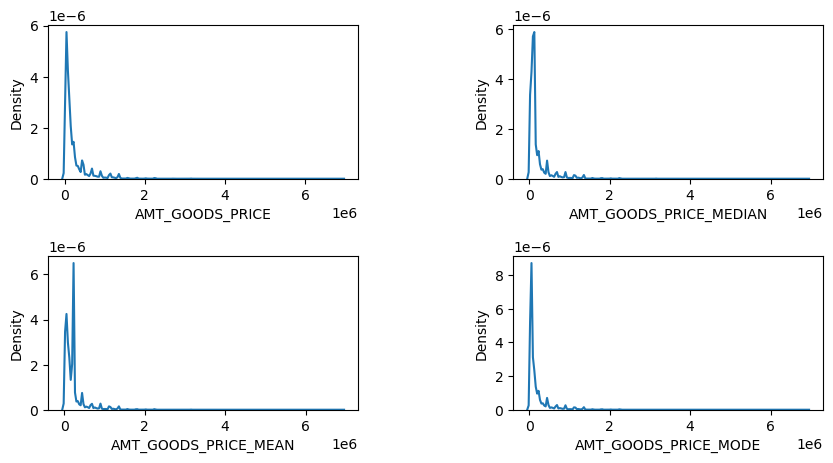

In [189]:
#plot the graph
plt.figure(figsize=(10,5))

for i,col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [190]:
#From the graph it seems median graph is more identical to the original one.so will take median values to impute the missing values in AMT_GOODS_PRICE columns
prev_app_nva_col_rmvd['AMT_GOODS_PRICE']=prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [191]:
#Verifying whether all the missing values has been imputed or there is still some missing values present in the AMT_GOODS_PRICE column
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [192]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])#finding mean, median and max of AMT_ANNUITY column

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [193]:
#Imputing the missing values present on the AMT_ANNUITY column with median value
prev_app_nva_col_rmvd['AMT_ANNUITY']=prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())

In [194]:
#verifying the presence of missing value is null or not
prev_app_nva_col_rmvd['AMT_ANNUITY'].isnull().sum()

0

In [195]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [196]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION']=prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])

In [197]:
#verifying the presence of missing value is null or not
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].isnull().sum()

0

In [198]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])#finding mean, median and max of CNT_PAYMENT column

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [199]:
#Lets explore the two columns in which CNT_PAYMENT will tells the tenure of the application and NAME_CONTRACT_STATUS will tell the status of the application for the previous application
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)#from the output we can observe that the canceled status is comparitevely higher than the other status so using mean ,median and mode for imputing missing values in a column is not ideal in such case. 

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [200]:
#imputing the missing values with 0 in the CNT_PAYMENT column because most of the application status is canceled so using mean,median, mode for imputation is not suitable 
prev_app_nva_col_rmvd['CNT_PAYMENT']=prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)

In [201]:
#now again check the missing values present in the datasets after imputing the columns where the missing values present.
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100

AMT_CREDIT                0.00006
SK_ID_PREV                0.00000
NAME_GOODS_CATEGORY       0.00000
AMT_GOODS_PRICE_MEAN      0.00000
AMT_GOODS_PRICE_MEDIAN    0.00000
PRODUCT_COMBINATION       0.00000
NAME_YIELD_GROUP          0.00000
CNT_PAYMENT               0.00000
NAME_SELLER_INDUSTRY      0.00000
SELLERPLACE_AREA          0.00000
CHANNEL_TYPE              0.00000
NAME_PRODUCT_TYPE         0.00000
NAME_PORTFOLIO            0.00000
NAME_CLIENT_TYPE          0.00000
SK_ID_CURR                0.00000
CODE_REJECT_REASON        0.00000
NAME_PAYMENT_TYPE         0.00000
DAYS_DECISION             0.00000
NAME_CONTRACT_STATUS      0.00000
NAME_CASH_LOAN_PURPOSE    0.00000
AMT_GOODS_PRICE           0.00000
AMT_APPLICATION           0.00000
AMT_ANNUITY               0.00000
NAME_CONTRACT_TYPE        0.00000
AMT_GOODS_PRICE_MODE      0.00000
dtype: float64

In [202]:
#lets drop the three variables (AMT_GOODS_PRICE_MEDIAN,AMT_GOODS_PRICE_MEAN,AMT_GOODS_PRICE_MODE) which we have created for our analysis from the data 
prev_app_nva_col_rmvd=prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)

In [203]:
#now again check the missing values present in the datasets after droping the three variables which was created for analysis
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100

AMT_CREDIT                0.00006
SK_ID_PREV                0.00000
NAME_CLIENT_TYPE          0.00000
NAME_YIELD_GROUP          0.00000
CNT_PAYMENT               0.00000
NAME_SELLER_INDUSTRY      0.00000
SELLERPLACE_AREA          0.00000
CHANNEL_TYPE              0.00000
NAME_PRODUCT_TYPE         0.00000
NAME_PORTFOLIO            0.00000
NAME_GOODS_CATEGORY       0.00000
CODE_REJECT_REASON        0.00000
SK_ID_CURR                0.00000
NAME_PAYMENT_TYPE         0.00000
DAYS_DECISION             0.00000
NAME_CONTRACT_STATUS      0.00000
NAME_CASH_LOAN_PURPOSE    0.00000
AMT_GOODS_PRICE           0.00000
AMT_APPLICATION           0.00000
AMT_ANNUITY               0.00000
NAME_CONTRACT_TYPE        0.00000
PRODUCT_COMBINATION       0.00000
dtype: float64

In [204]:
#number of columns present
len(prev_app_nva_col_rmvd.columns)

22

In [205]:
prev_app_nva_col_rmvd.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [206]:
#merge the two datasets 
merged_df=pd.merge(app_score_col_rmvd,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       16765           1188             1186.0              291   
3       16765           1188             1186.0              291   
4       19046            225             4260.0             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0         

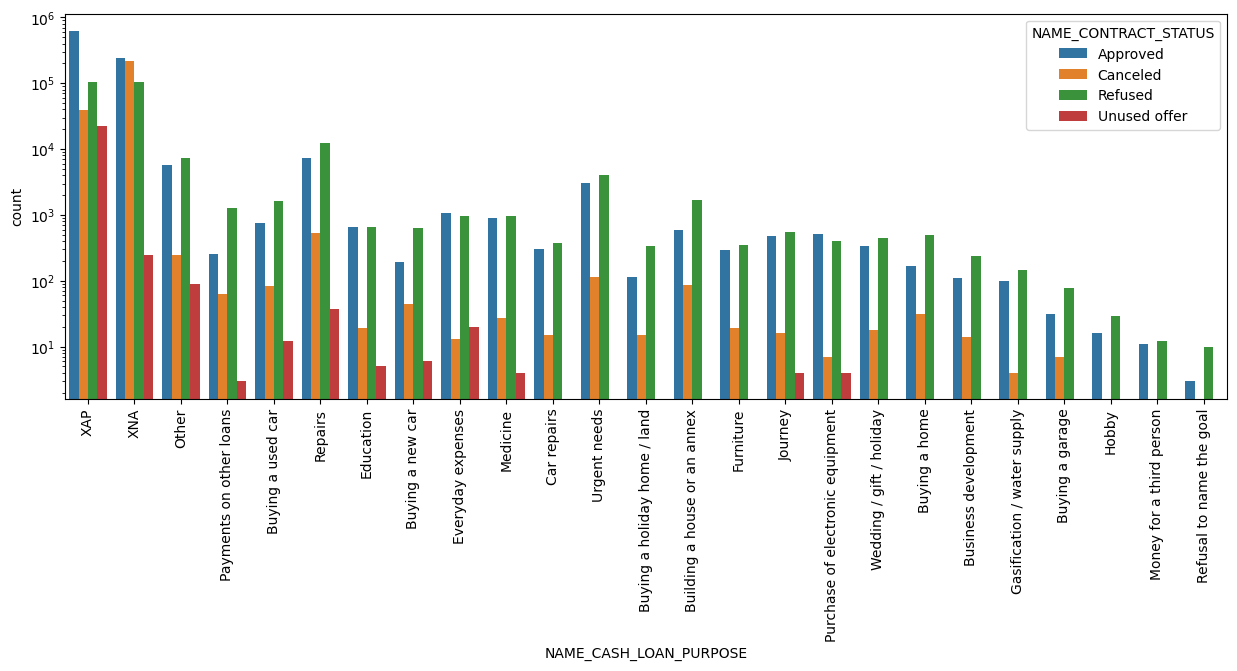

In [207]:
#data analysis on the merged dataset by ploting countplot
plt.figure(figsize=(15,5))
sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

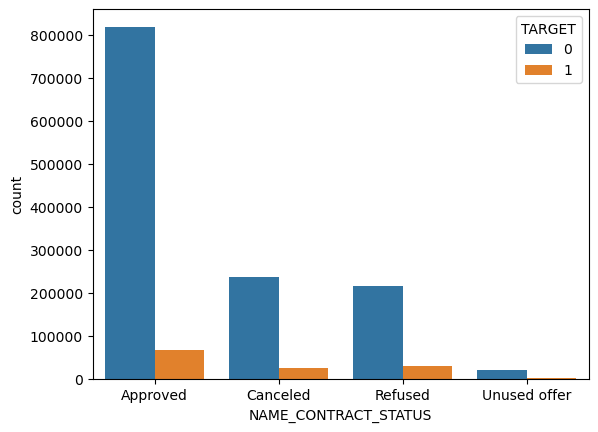

In [208]:
#what happened when customer applied for the loan again
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET') #From the output we can infer that most of customers whose earlier application was canceled or refused are now repayers i.e, (non-defaulter)

In [209]:
#In terms of numeric data
merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size()

NAME_CONTRACT_STATUS  TARGET
Approved              0         818856
                      1          67243
Canceled              0         235641
                      1          23800
Refused               0         215952
                      1          29438
Unused offer          0          20892
                      1           1879
dtype: int64

In [210]:
# rename the index name 
merged_agg=merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
merged_agg

NAME_CONTRACT_STATUS  TARGET  counts
0             Approved       0  818856
1             Approved       1   67243
2             Canceled       0  235641
3             Canceled       1   23800
4              Refused       0  215952
5              Refused       1   29438
6         Unused offer       0   20892
7         Unused offer       1    1879

In [211]:
# convert the count in terms of percentage
sum_df=merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()
merged_agg_2=pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2

NAME_CONTRACT_STATUS  TARGET  counts_x  counts_y
0             Approved       0    818856    886099
1             Approved       1     67243    886099
2             Canceled       0    235641    259441
3             Canceled       1     23800    259441
4              Refused       0    215952    245390
5              Refused       1     29438    245390
6         Unused offer       0     20892     22771
7         Unused offer       1      1879     22771

In [212]:
merged_agg_2['pct']=round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

NAME_CONTRACT_STATUS  TARGET  counts_x  counts_y    pct
0             Approved       0    818856    886099  92.41
1             Approved       1     67243    886099   7.59
2             Canceled       0    235641    259441  90.83
3             Canceled       1     23800    259441   9.17
4              Refused       0    215952    245390  88.00
5              Refused       1     29438    245390  12.00
6         Unused offer       0     20892     22771  91.75
7         Unused offer       1      1879     22771   8.25

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5592\563267390.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

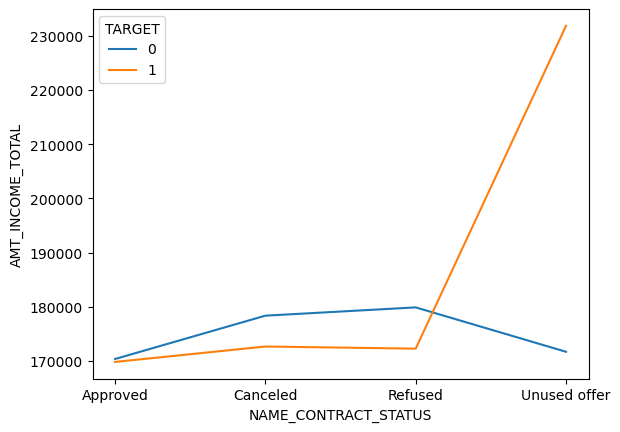

In [213]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [214]:
len(merged_df.columns)

70

In [215]:
#To know the rows and columns currently present in the merged dataset (merged_df).
merged_df.shape #So currently 1413701 r)ows and 70 columns are availabe in merged_df

(1413701, 70)

In [216]:
#To get the essential information about the dataframe merged_df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   CNT_CHILDREN                 1413701 non-null  int64   
 5   AMT_INCOME_TOTAL             1413701 non-null  float64 
 6   AMT_CREDIT_x                 1413701 non-null  float64 
 7   AMT_ANNUITY_x                1413701 non-null  float64 
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64 
 9   NAME_TYPE_SUITE              1413701 non-null  object  
 10  NAME_INCOME_TYPE             1413701 non-null  object  
 11  NAME_EDUCATION_TYPE          1413701 non-null  object  
 12  NAME_FAMILY_STATUS          

In [217]:
merged_df.isnull().any().any()

True

In [218]:
merged_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT_x                      0
AMT_ANNUITY_x                     0
AMT_GOODS_PRICE_x                 0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION 

In [219]:
#sort the values
merged_df.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
AMT_REQ_CREDIT_BUREAU_QRT         0
AMT_REQ_CREDIT_BUREAU_YEAR        0
AMT_GOODS_PRICE_RANGE             0
AMT_INCOME_TOTAL_RANGE            0
AMT_CREDIT_RANGE                  0
AMT_ANNUITY_RANGE                 0
DAYS_BIRTH_RANGE                  0
SK_ID_PREV                        0
NAME_CONTRACT_TYPE_y              0
AMT_ANNUITY_y                     0
AMT_APPLICATION                   0
AMT_GOODS_PRICE_y                 0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA            

In [220]:
merged_df[['AMT_CREDIT_y']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 1 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   AMT_CREDIT_y  1413700 non-null  float64
dtypes: float64(1)
memory usage: 10.8 MB


In [221]:
#lets drop these columns from the data frame because it contains very less amout of missing values and are not creating much impact on data analysis and modeling.
merged_df.drop(['AMT_CREDIT_y','DAYS_EMPLOYED_RANGE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [222]:
#after dropping the non-essential columns from merged_df data frame lets check the information 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   CNT_CHILDREN                 1413701 non-null  int64   
 5   AMT_INCOME_TOTAL             1413701 non-null  float64 
 6   AMT_CREDIT_x                 1413701 non-null  float64 
 7   AMT_ANNUITY_x                1413701 non-null  float64 
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64 
 9   NAME_TYPE_SUITE              1413701 non-null  object  
 10  NAME_INCOME_TYPE             1413701 non-null  object  
 11  NAME_EDUCATION_TYPE          1413701 non-null  object  
 12  NAME_FAMILY_STATUS          

In [223]:
#Once again lets check the missing values
merged_df.isnull().any().any()

False

In [224]:
#To know the number of columns and rows currently present in the dataframe
merged_df.shape

(1413701, 64)

In [225]:
#To know the Number of default and Non-default present in the Target column
merged_df['TARGET'].value_counts() 

TARGET
0    1291341
1     122360
Name: count, dtype: int64

In [226]:
merged_df['TARGET'].value_counts(normalize=True)
#From the output it seems that the data set is imbalance

TARGET
0    0.913447
1    0.086553
Name: proportion, dtype: float64

In [227]:
X = merged_df.drop(labels='TARGET', axis=1) # Features
y = merged_df.loc[:,'TARGET']

In [228]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       16765           1188             1186.0              291   
3       16765           1188             1186.0              291   
4       19046            225             4260.0             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0         

In [229]:
merged_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   CNT_CHILDREN                 1413701 non-null  int64   
 5   AMT_INCOME_TOTAL             1413701 non-null  float64 
 6   AMT_CREDIT_x                 1413701 non-null  float64 
 7   AMT_ANNUITY_x                1413701 non-null  float64 
 8   AMT_GOODS_PRICE_x            1413701 non-null  float64 
 9   NAME_TYPE_SUITE              1413701 non-null  object  
 10  NAME_INCOME_TYPE             1413701 non-null  object  
 11  NAME_EDUCATION_TYPE          1413701 non-null  object  
 12  NAME_FAMILY_STATUS          

# **Convert Object type columns into Numeric type**

In [230]:
#lets findout the columns which are Object 
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [231]:
len(list(merged_df.columns[merged_df.dtypes == "object"]))

23

In [232]:
merged_df['NAME_CONTRACT_TYPE_x'].value_counts()

NAME_CONTRACT_TYPE_x
Cash loans         1307115
Revolving loans     106586
Name: count, dtype: int64

In [233]:
# Mapping the categorical values to numeric values
mapping = {'Cash loans': 0, 'Revolving loans': 1}
merged_df['NAME_CONTRACT_TYPE_x_numeric'] = merged_df['NAME_CONTRACT_TYPE_x'].map(mapping)



In [234]:
# Check the transformation
print(merged_df[['NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_TYPE_x_numeric']].head())

  NAME_CONTRACT_TYPE_x  NAME_CONTRACT_TYPE_x_numeric
0           Cash loans                             0
1           Cash loans                             0
2           Cash loans                             0
3           Cash loans                             0
4      Revolving loans                             1


In [235]:
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       16765           1188             1186.0              291   
3       16765           1188             1186.0              291   
4       19046            225             4260.0             2531   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0         

In [236]:
# Drop the original column and keep only the numeric column
merged_df = merged_df.drop(columns=['NAME_CONTRACT_TYPE_x'])

In [237]:
# Check the updated dataframe
merged_df.head()

SK_ID_CURR  TARGET CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1           M             0          202500.0   
1      100003       0           F             0          270000.0   
2      100003       0           F             0          270000.0   
3      100003       0           F             0          270000.0   
4      100004       0           M             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0   Unaccompanied   
1     1293502.5        35698.5          1129500.0          Family   
2     1293502.5        35698.5          1129500.0          Family   
3     1293502.5        35698.5          1129500.0          Family   
4      135000.0         6750.0           135000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4               

In [238]:
merged_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      955139
M      458507
XNA        55
Name: count, dtype: int64

In [239]:
# Mapping the categorical values to numeric values
gender_mapping = {'F': 0, 'M': 1, 'XNA': 2}
merged_df['CODE_GENDER'] = merged_df['CODE_GENDER'].map(gender_mapping)



In [240]:
# Check the transformation
print(merged_df['CODE_GENDER'].unique())
print(merged_df[['CODE_GENDER']].head())

[1 0 2]
   CODE_GENDER
0            1
1            0
2            0
3            0
4            1


In [241]:
# Check the updated dataframe
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0   Unaccompanied   
1     1293502.5        35698.5          1129500.0          Family   
2     1293502.5        35698.5          1129500.0          Family   
3     1293502.5        35698.5          1129500.0          Family   
4      135000.0         6750.0           135000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4         

In [242]:
merged_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      1157904
Family              184261
Spouse, partner      46652
Children             13906
Other_B               6735
Other_A               3020
Group of people       1223
Name: count, dtype: int64

In [243]:
# Define the mapping
suite_mapping = {
    'Unaccompanied': 0,
    'Family': 1,
    'Spouse, partner': 2,
    'Children': 3,
    'Other_B': 4,
    'Other_A': 5,
    'Group of people': 6
}



In [244]:
# Apply the mapping to the column
merged_df['NAME_TYPE_SUITE'] = merged_df['NAME_TYPE_SUITE'].map(suite_mapping)




In [245]:
# Check the transformation
print(merged_df['NAME_TYPE_SUITE'].unique())


[0 1 2 3 5 6 4]


In [246]:
print(merged_df[['NAME_TYPE_SUITE']].head())

   NAME_TYPE_SUITE
0                0
1                1
2                1
3                1
4                0


In [247]:
merged_df.head(5)

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4   

In [248]:
merged_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 724089
Commercial associate    321481
Pensioner               273544
State servant            94424
Unemployed                 123
Student                     24
Maternity leave             16
Name: count, dtype: int64

In [249]:
# Define the mapping
income_type_mapping = {
    'Working': 0,
    'Commercial associate': 1,
    'Pensioner': 2,
    'State servant': 3,
    'Unemployed': 4,
    'Student': 5,
    'Maternity leave': 6
}



In [250]:
# Apply the mapping to the column
merged_df['NAME_INCOME_TYPE'] = merged_df['NAME_INCOME_TYPE'].map(income_type_mapping)



In [251]:
# Check the transformation
print(merged_df['NAME_INCOME_TYPE'].unique())


[0 3 1 2 4 5 6]


In [252]:
print(merged_df[['NAME_INCOME_TYPE']].head())

   NAME_INCOME_TYPE
0                 0
1                 3
2                 3
3                 3
4                 0


In [253]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                 0  Secondary / secondary special  Single / not married   
1                 3               Higher education               Married   
2                 3               Higher education               Married   
3                 3               Higher education               Married   
4                 0  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School  

In [254]:
merged_df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    1037902
Higher education                  312845
Incomplete higher                  45211
Lower secondary                    17164
Academic degree                      579
Name: count, dtype: int64

In [255]:
# Define the mapping
education_type_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}





In [256]:
# Apply the mapping to the column
merged_df['NAME_EDUCATION_TYPE'] = merged_df['NAME_EDUCATION_TYPE'].map(education_type_mapping)

In [257]:
# Check the transformation
print(merged_df['NAME_EDUCATION_TYPE'].unique())


[1 3 2 0 4]


In [258]:
print(merged_df[['NAME_EDUCATION_TYPE']].head())

   NAME_EDUCATION_TYPE
0                    1
1                    3
2                    3
3                    3
4                    1


In [259]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                 0                    1  Single / not married   
1                 3                    3               Married   
2                 3                    3               Married   
3                 3                    3               Married   
4                 0                    1  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0        

In [260]:
merged_df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 910910
Single / not married    186657
Civil marriage          143157
Separated                91338
Widow                    81639
Name: count, dtype: int64

In [261]:
# Define the mapping
family_status_mapping = {
    'Married': 0,
    'Single / not married': 1,
    'Civil marriage': 2,
    'Separated': 3,
    'Widow': 4
}



In [262]:
# Apply the mapping to the column
merged_df['NAME_FAMILY_STATUS'] = merged_df['NAME_FAMILY_STATUS'].map(family_status_mapping)



In [263]:
# Check the transformation
print(merged_df['NAME_FAMILY_STATUS'].unique())


[1 0 2 4 3]


In [264]:
print(merged_df[['NAME_FAMILY_STATUS']].head())

   NAME_FAMILY_STATUS
0                   1
1                   0
2                   0
3                   0
4                   1


In [265]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.003541       16765           1188   
3  House / apartment                    0.003541       16765           1188   
4  House / apartment                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Govern

In [266]:
merged_df['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      1264952
With parents             61614
Municipal apartment      51533
Rented apartment         19785
Office apartment         11428
Co-op apartment           4389
Name: count, dtype: int64

In [267]:
# Define the mapping
housing_type_mapping = {
    'House / apartment': 0,
    'With parents': 1,
    'Municipal apartment': 2,
    'Rented apartment': 3,
    'Office apartment': 4,
    'Co-op apartment': 5
}



In [268]:
# Apply the mapping to the column
merged_df['NAME_HOUSING_TYPE'] = merged_df['NAME_HOUSING_TYPE'].map(housing_type_mapping)



In [269]:
# Check the transformation
print(merged_df['NAME_HOUSING_TYPE'].unique())


[0 3 1 2 4 5]


In [270]:
print(merged_df[['NAME_HOUSING_TYPE']].head())

   NAME_HOUSING_TYPE
0                  0
1                  0
2                  0
3                  0
4                  0


In [271]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120        Laborers              1.0   
1             1186.0              291      Core staff              2.0   
2             1186.0              291      Core staff              2.0   
3             1186.0              291      Core staff              2.0   
4             4260.0             2531        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Govern

In [272]:
merged_df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 708879
Sales staff              151358
Core staff               118272
Managers                  94941
Drivers                   84067
High skill tech staff     48483
Accountants               41958
Medicine staff            39999
Security staff            31702
Cooking staff             28726
Cleaning staff            24328
Private service staff     12238
Low-skill Laborers         9320
Waiters/barmen staff       6132
Secretaries                5738
Realty agents              3544
HR staff                   2313
IT staff                   1703
Name: count, dtype: int64

In [273]:
# Define the mapping
occupation_type_mapping = {
    'Laborers': 0,
    'Sales staff': 1,
    'Core staff': 2,
    'Managers': 3,
    'Drivers': 4,
    'High skill tech staff': 5,
    'Accountants': 6,
    'Medicine staff': 7,
    'Security staff': 8,
    'Cooking staff': 9,
    'Cleaning staff': 10,
    'Private service staff': 11,
    'Low-skill Laborers': 12,
    'Waiters/barmen staff': 13,
    'Secretaries': 14,
    'Realty agents': 15,
    'HR staff': 16,
    'IT staff': 17
}



In [274]:
# Apply the mapping to the column
merged_df['OCCUPATION_TYPE'] = merged_df['OCCUPATION_TYPE'].map(occupation_type_mapping)



In [275]:
# Check the transformation
print(merged_df['OCCUPATION_TYPE'].unique())



[ 0  2  6  3  4  1 10 11  7  8  9  5 13 12 15 14 17 16]


In [276]:
print(merged_df[['OCCUPATION_TYPE']].head())

   OCCUPATION_TYPE
0                0
1                2
2                2
3                2
4                0


In [277]:
merged_df.head()


SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              

In [278]:
merged_df['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      248632
WEDNESDAY    236197
MONDAY       234497
THURSDAY     230278
FRIDAY       230247
SATURDAY     157173
SUNDAY        76677
Name: count, dtype: int64

In [279]:
# Define the mapping
weekday_mapping = {
    'MONDAY': 0,
    'TUESDAY': 1,
    'WEDNESDAY': 2,
    'THURSDAY': 3,
    'FRIDAY': 4,
    'SATURDAY': 5,
    'SUNDAY': 6
}



In [280]:
# Apply the mapping to the column
merged_df['WEEKDAY_APPR_PROCESS_START'] = merged_df['WEEKDAY_APPR_PROCESS_START'].map(weekday_mapping)



In [281]:
# Check the transformation
print(merged_df['WEEKDAY_APPR_PROCESS_START'].unique())


[2 0 3 6 5 4 1]


In [282]:
print(merged_df[['WEEKDAY_APPR_PROCESS_START']].head())

   WEEKDAY_APPR_PROCESS_START
0                           2
1                           0
2                           0
3                           0
4                           0


In [283]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0        

In [284]:
merged_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    304889
XNA                       273583
Self-employed             183106
Other                      73531
Medicine                   52086
Business Entity Type 2     46399
Government                 45740
School                     39007
Trade: type 7              37252
Kindergarten               31362
Construction               29716
Business Entity Type 1     25478
Transport: type 4          24609
Security                   15613
Industry: type 3           15247
Industry: type 9           14706
Housing                    13706
Trade: type 3              13666
Industry: type 11          12131
Military                   11582
Trade: type 2              11112
Agriculture                10786
Bank                       10684
Police                     10346
Postal                     10067
Transport: type 2           9173
Security Ministries         8432
Restaurant                  8253
Services                    7021
Industry: type 7         

In [285]:
# Import necessary library
from sklearn.preprocessing import LabelEncoder



In [286]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [287]:
# Apply label encoding to the ORGANIZATION_TYPE column
merged_df['ORGANIZATION_TYPE'] = label_encoder.fit_transform(merged_df['ORGANIZATION_TYPE'])



In [288]:
# Check the transformation
print(merged_df['ORGANIZATION_TYPE'].unique())


[ 5 39 11 37 33 57  9 30  4 42 53  7 13 28 51 16 31 43 41 55 14 10 40 46
 56 34  3 35 54 21  1 38  8 12 24 20  2 47 26 50 19 52 17 27 32 45 22 15
 29  0 49  6 18 48 44 25 36 23]


In [289]:
print(merged_df[['ORGANIZATION_TYPE']].head())

   ORGANIZATION_TYPE
0                  5
1                 39
2                 39
3                 39
4                 11


In [290]:

merged_df.head()


SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [291]:
merged_df['NAME_CONTRACT_TYPE_y'].value_counts()

NAME_CONTRACT_TYPE_y
Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: count, dtype: int64

In [292]:
from sklearn.preprocessing import LabelEncoder



In [293]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [294]:
# Apply label encoding to the NAME_CONTRACT_TYPE_y column
merged_df['NAME_CONTRACT_TYPE_y'] = label_encoder.fit_transform(merged_df['NAME_CONTRACT_TYPE_y'])



In [295]:
# Check the transformation
print(merged_df['NAME_CONTRACT_TYPE_y'].unique())


[1 0 2 3]


In [296]:
print(merged_df[['NAME_CONTRACT_TYPE_y']].head())

   NAME_CONTRACT_TYPE_y
0                     1
1                     0
2                     1
3                     1
4                     1


In [297]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [298]:
merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                          

In [299]:
from sklearn.preprocessing import LabelEncoder




In [300]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [301]:
# Apply label encoding to the NAME_CASH_LOAN_PURPOSE column
merged_df['NAME_CASH_LOAN_PURPOSE'] = label_encoder.fit_transform(merged_df['NAME_CASH_LOAN_PURPOSE'])



In [302]:
# Check the transformation
print(merged_df['NAME_CASH_LOAN_PURPOSE'].unique())


[23 24 16 17  6 20  8  5  9 14  7 21  3  0 10 13 18 22  4  1 11  2 12 15
 19]


In [303]:
print(merged_df[['NAME_CASH_LOAN_PURPOSE']].head())

   NAME_CASH_LOAN_PURPOSE
0                      23
1                      24
2                      23
3                      23
4                      23


In [304]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [305]:
merged_df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: count, dtype: int64

In [306]:
from sklearn.preprocessing import LabelEncoder



In [307]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()


In [308]:

# Apply label encoding to the NAME_CONTRACT_STATUS column
merged_df['NAME_CONTRACT_STATUS'] = label_encoder.fit_transform(merged_df['NAME_CONTRACT_STATUS'])



In [309]:
# Check the transformation
print(merged_df['NAME_CONTRACT_STATUS'].unique())


[0 1 2 3]


In [310]:
print(merged_df[['NAME_CONTRACT_STATUS']].head())

   NAME_CONTRACT_STATUS
0                     0
1                     0
2                     0
3                     0
4                     0


In [311]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [312]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [313]:
merged_df['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        882700
XNA                                          522960
Non-cash from your account                     7100
Cashless from the account of the employer       941
Name: count, dtype: int64

In [314]:
from sklearn.preprocessing import LabelEncoder




In [315]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [316]:
# Apply label encoding to the NAME_PAYMENT_TYPE column
merged_df['NAME_PAYMENT_TYPE'] = label_encoder.fit_transform(merged_df['NAME_PAYMENT_TYPE'])



In [317]:
# Check the transformation
print(merged_df['NAME_PAYMENT_TYPE'].unique())


[3 0 2 1]


In [318]:
print(merged_df[['NAME_PAYMENT_TYPE']].head())

   NAME_PAYMENT_TYPE
0                  3
1                  3
2                  0
3                  0
4                  0


In [319]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [320]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [321]:
merged_df['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: count, dtype: int64

In [322]:
from sklearn.preprocessing import LabelEncoder



In [323]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [324]:
# Apply label encoding to the CODE_REJECT_REASON column
merged_df['CODE_REJECT_REASON'] = label_encoder.fit_transform(merged_df['CODE_REJECT_REASON'])



In [325]:
# Check the transformation
print(merged_df['CODE_REJECT_REASON'].unique())



[7 2 1 3 4 6 0 8 5]


In [326]:
print(merged_df[['CODE_REJECT_REASON']].head())

   CODE_REJECT_REASON
0                   7
1                   7
2                   7
3                   7
4                   7


In [327]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [328]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [329]:
merged_df['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1037682
New           259540
Refreshed     114936
XNA             1543
Name: count, dtype: int64

In [330]:
from sklearn.preprocessing import LabelEncoder



In [331]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()




In [332]:
# Apply label encoding to the NAME_CLIENT_TYPE column
merged_df['NAME_CLIENT_TYPE'] = label_encoder.fit_transform(merged_df['NAME_CLIENT_TYPE'])



In [333]:
# Check the transformation
print(merged_df['NAME_CLIENT_TYPE'].unique())


[0 2 1 3]


In [334]:
print(merged_df[['NAME_CLIENT_TYPE']].head())

   NAME_CLIENT_TYPE
0                 0
1                 2
2                 1
3                 1
4                 0


In [335]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [336]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [337]:
merged_df['NAME_GOODS_CATEGORY'].value_counts()

NAME_GOODS_CATEGORY
XNA                         797209
Mobile                      193743
Consumer Electronics        104785
Computers                    89923
Audio/Video                  85502
Furniture                    45439
Photo / Cinema Equipment     21707
Construction Materials       21356
Clothing and Accessories     19590
Auto Accessories              6228
Jewelry                       5188
Homewares                     4309
Medical Supplies              3240
Vehicles                      2854
Sport and Leisure             2540
Other                         2337
Gardening                     2322
Office Appliances             1985
Tourism                       1324
Medicine                      1302
Direct Sales                   330
Fitness                        166
Additional Service             109
Education                       89
Weapon                          65
Insurance                       58
Animals                          1
Name: count, dtype: int64

In [338]:
from sklearn.preprocessing import LabelEncoder



In [339]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [340]:
# Apply label encoding to the NAME_GOODS_CATEGORYcolumn
merged_df['NAME_GOODS_CATEGORY'] = label_encoder.fit_transform(merged_df['NAME_GOODS_CATEGORY'])



In [341]:
# Check the transformation
print(merged_df['NAME_GOODS_CATEGORY'].unique())



[24 26 11  7 18  2  6 12 21  5  4 13 16 20 15 19 23  3 22 17 25  8 10 14
  0  9  1]


In [342]:
print(merged_df[['NAME_GOODS_CATEGORY']].head())

   NAME_GOODS_CATEGORY
0                   24
1                   26
2                   11
3                    7
4                   18


In [343]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [344]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [345]:
merged_df['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      592460
Cash     391663
XNA      307213
Cards    121985
Cars        380
Name: count, dtype: int64

In [346]:
from sklearn.preprocessing import LabelEncoder



In [347]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [348]:
# Apply label encoding to the NAME_PORTFOLIO column
merged_df['NAME_PORTFOLIO'] = label_encoder.fit_transform(merged_df['NAME_CLIENT_TYPE'])



In [349]:
# Check the transformation
print(merged_df['NAME_PORTFOLIO'].unique())


[0 2 1 3]


In [350]:
print(merged_df[['NAME_PORTFOLIO']].head())


   NAME_PORTFOLIO
0               0
1               2
2               1
3               1
4               0


In [351]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [352]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [353]:
merged_df['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
2    1037682
0     259540
1     114936
3       1543
Name: count, dtype: int64

In [354]:
from sklearn.preprocessing import LabelEncoder




In [355]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [356]:
# Apply label encoding to the NAME_PORTFOLIO column
merged_df['NAME_PORTFOLIO'] = label_encoder.fit_transform(merged_df['NAME_PORTFOLIO'])



In [357]:
# Check the transformation
print(merged_df['NAME_PORTFOLIO'].unique())


[0 2 1 3]


In [358]:
print(merged_df[['NAME_PORTFOLIO']].head())

   NAME_PORTFOLIO
0               0
1               2
2               1
3               1
4               0


In [359]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [360]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [361]:
merged_df['NAME_PRODUCT_TYPE'].value_counts()

NAME_PRODUCT_TYPE
XNA        900053
x-sell     385394
walk-in    128254
Name: count, dtype: int64

In [362]:
from sklearn.preprocessing import LabelEncoder



In [363]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()




In [364]:
# Apply label encoding to the NAME_PRODUCT_TYPE column
merged_df['NAME_PRODUCT_TYPE'] = label_encoder.fit_transform(merged_df['NAME_CLIENT_TYPE'])



In [365]:
# Check the transformation
print(merged_df['NAME_PRODUCT_TYPE'].unique())


[0 2 1 3]


In [366]:
print(merged_df[['NAME_PRODUCT_TYPE']].head())

   NAME_PRODUCT_TYPE
0                  0
1                  2
2                  1
3                  1
4                  0


In [367]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [368]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))


['CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [369]:
merged_df['CHANNEL_TYPE'].value_counts()

CHANNEL_TYPE
Credit and cash offices       600342
Country-wide                  423062
Stone                         183508
Regional / Local               92472
Contact center                 58891
AP+ (Cash loan)                49624
Channel of corporate sales      5396
Car dealer                       406
Name: count, dtype: int64

In [370]:
from sklearn.preprocessing import LabelEncoder



In [371]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [372]:

# Apply label encoding to the CHANNEL_TYPE  column
merged_df['CHANNEL_TYPE'] = label_encoder.fit_transform(merged_df['CHANNEL_TYPE'])



In [373]:
# Check the transformation
print(merged_df['CHANNEL_TYPE'].unique())


[7 5 4 6 0 3 2 1]


In [374]:
print(merged_df[['CHANNEL_TYPE']].head())

   CHANNEL_TYPE
0             7
1             5
2             7
3             4
4             6


In [375]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [376]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [377]:
merged_df['CHANNEL_TYPE'].value_counts()

CHANNEL_TYPE
5    600342
4    423062
7    183508
6     92472
3     58891
0     49624
2      5396
1       406
Name: count, dtype: int64

In [378]:
from sklearn.preprocessing import LabelEncoder



In [379]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()




In [380]:
# Apply label encoding to the CHANNEL_TYPE column
merged_df['CHANNEL_TYPE'] = label_encoder.fit_transform(merged_df['CHANNEL_TYPE'])



In [381]:
# Check the transformation
print(merged_df['CHANNEL_TYPE'].unique())


[7 5 4 6 0 3 2 1]


In [382]:
print(merged_df[['CHANNEL_TYPE']].head())

   CHANNEL_TYPE
0             7
1             5
2             7
3             4
4             6


In [383]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [384]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [385]:
merged_df['NAME_SELLER_INDUSTRY'].value_counts()

NAME_SELLER_INDUSTRY
XNA                     715322
Consumer electronics    341701
Connectivity            238350
Furniture                48966
Construction             25417
Clothing                 19896
Industry                 16567
Auto technology           4080
Jewelry                   2107
MLM partners               921
Tourism                    374
Name: count, dtype: int64

In [386]:
from sklearn.preprocessing import LabelEncoder



In [387]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()




In [388]:
# Apply label encoding to the NAME_SELLER_INDUSTRY column
merged_df['NAME_SELLER_INDUSTRY'] = label_encoder.fit_transform(merged_df['NAME_SELLER_INDUSTRY'])



In [389]:
# Check the transformation
print(merged_df['NAME_SELLER_INDUSTRY'].unique())


[ 0 10  5  4  2  3  1  6  9  7  8]


In [390]:
print(merged_df[['NAME_SELLER_INDUSTRY']].head())

   NAME_SELLER_INDUSTRY
0                     0
1                    10
2                     5
3                     4
4                     2


In [391]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [392]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [393]:
merged_df['NAME_YIELD_GROUP'].value_counts()

NAME_YIELD_GROUP
XNA           429198
middle        324971
high          306061
low_normal    274884
low_action     78587
Name: count, dtype: int64

In [394]:
from sklearn.preprocessing import LabelEncoder




In [395]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [396]:
# Apply label encoding to the NAME_YIELD_GROUP column
merged_df['NAME_YIELD_GROUP'] = label_encoder.fit_transform(merged_df['NAME_YIELD_GROUP'])



In [397]:
# Check the transformation
print(merged_df['NAME_YIELD_GROUP'].unique())


[3 4 0 1 2]


In [398]:
print(merged_df[['NAME_YIELD_GROUP']].head())

   NAME_YIELD_GROUP
0                 3
1                 3
2                 4
3                 4
4                 4


In [399]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [400]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

['PRODUCT_COMBINATION']


In [401]:
merged_df['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              235414
POS household with interest       226464
POS mobile with interest          190850
Cash X-Sell: middle               120036
Cash X-Sell: low                  110599
Card Street                        94594
POS industry with interest         83508
POS household without interest     71519
Card X-Sell                        66774
Cash Street: high                  51699
Cash X-Sell: high                  50802
Cash Street: middle                29934
Cash Street: low                   28593
POS other with interest            20309
POS mobile without interest        19890
POS industry without interest      10621
POS others without interest         2095
Name: count, dtype: int64

In [402]:
from sklearn.preprocessing import LabelEncoder




In [403]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()



In [404]:
# Apply label encoding to the PRODUCT_COMBINATION column
merged_df['PRODUCT_COMBINATION'] = label_encoder.fit_transform(merged_df['PRODUCT_COMBINATION'])



In [405]:
# Check the transformation
print(merged_df['PRODUCT_COMBINATION'].unique())


[15  7 11  9 14  0  1  6  2  3  8 13 10 12  4  5 16]


In [406]:
print(merged_df[['PRODUCT_COMBINATION']].head())

   PRODUCT_COMBINATION
0                   15
1                    7
2                   11
3                    9
4                   14


In [407]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [408]:
print(list(merged_df.columns[merged_df.dtypes == "object"]))

[]


In [409]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   CODE_GENDER                   1413701 non-null  int64   
 3   CNT_CHILDREN                  1413701 non-null  int64   
 4   AMT_INCOME_TOTAL              1413701 non-null  float64 
 5   AMT_CREDIT_x                  1413701 non-null  float64 
 6   AMT_ANNUITY_x                 1413701 non-null  float64 
 7   AMT_GOODS_PRICE_x             1413701 non-null  float64 
 8   NAME_TYPE_SUITE               1413701 non-null  int64   
 9   NAME_INCOME_TYPE              1413701 non-null  int64   
 10  NAME_EDUCATION_TYPE           1413701 non-null  int64   
 11  NAME_FAMILY_STATUS            1413701 non-null  int64   
 12  NAME_HOUSING_T

# **Convert Category into numeric dataset**

In [410]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_GOODS_PRICE_RANGE', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [411]:
merged_df['AMT_GOODS_PRICE_RANGE'].value_counts()

AMT_GOODS_PRICE_RANGE
200k-300k     287431
400k-500k     264437
Above 900k    184734
600k-700k     176029
100k-200k     146955
300k-400k     104921
800k-900k      95729
500k-600k      67310
0-100k         44676
700k-800k      41479
Name: count, dtype: int64

In [412]:
def convert_amt_goods_price(value):
    try:
        # Handling ranges like "200k-300k"
        if '-' in value:
            parts = value.replace('k', '000').split('-')
            low, high = int(parts[0].strip()), int(parts[1].strip())
            return (low + high) / 2
        
        # Handling "Above 900k"
        elif 'Above' in value:
            num = int(value.replace('Above', '').replace('k', '000').strip())
            return num + 50000  # Taking an upper midpoint (900k + 50k)
        
        # If it's a number already, just convert it
        else:
            return float(value)
    except:
        return np.nan



In [413]:
# Applying the function to the AMT_GOODS_PRICE_RANGE column
merged_df['AMT_GOODS_PRICE_NUMERIC'] = merged_df['AMT_GOODS_PRICE_RANGE'].apply(convert_amt_goods_price)



In [414]:
# Check the transformed data
print(merged_df[['AMT_GOODS_PRICE_RANGE', 'AMT_GOODS_PRICE_NUMERIC']].head())

  AMT_GOODS_PRICE_RANGE AMT_GOODS_PRICE_NUMERIC
0             300k-400k                350000.0
1            Above 900k                950000.0
2            Above 900k                950000.0
3            Above 900k                950000.0
4             100k-200k                150000.0


In [415]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [416]:
merged_df.dtypes['AMT_GOODS_PRICE_NUMERIC']

CategoricalDtype(categories=[ 50000.0, 150000.0, 250000.0, 350000.0, 450000.0, 550000.0,
                  650000.0, 750000.0, 850000.0, 950000.0],
, ordered=True, categories_dtype=float64)

In [417]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_GOODS_PRICE_RANGE', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE', 'AMT_GOODS_PRICE_NUMERIC']


In [418]:
# Dropping the AMT_GOODS_PRICE_RANGE column
merged_df = merged_df.drop(columns=['AMT_GOODS_PRICE_RANGE'])



In [419]:
# Verifying if the column has been dropped
print(merged_df.head())

   SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3           

In [420]:
merged_df.head()

SK_ID_CURR  TARGET  CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0      100002       1            1             0          202500.0   
1      100003       0            0             0          270000.0   
2      100003       0            0             0          270000.0   
3      100003       0            0             0          270000.0   
4      100004       0            1             0           67500.0   

   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE  \
0      406597.5        24700.5           351000.0                0   
1     1293502.5        35698.5          1129500.0                1   
2     1293502.5        35698.5          1129500.0                1   
3     1293502.5        35698.5          1129500.0                1   
4      135000.0         6750.0           135000.0                0   

   NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                 0                    1                   1   
1                 3                    3                   0   
2                 3                    3                   0   
3                 3                    3                   0   
4                 0                    1                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801        9461            637   
1                  0                    0.003541       16765           1188   
2                  0                    0.003541       16765           1188   
3                  0                    0.003541       16765           1188   
4                  0                    0.010032       19046            225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3648.0             2120                0              1.0   
1             1186.0              291                2              2.0   
2             1186.0              291                2              2.0   
3             1186.0              291                2              2.0   
4             4260.0             2531                0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           2                       10   
1                           0                       11   
2                           0                       11   
3                           0                       11   
4                           0                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 39   
3                       0                        0                 39   
4                       0                        0                 11   

   DAYS_L

In [421]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE', 'AMT_GOODS_PRICE_NUMERIC']


In [422]:
# Converting the column to numeric explicitly
merged_df['AMT_GOODS_PRICE_NUMERIC'] = pd.to_numeric(merged_df['AMT_GOODS_PRICE_NUMERIC'], errors='coerce')



In [423]:
# Verifying the data type after conversion
print(merged_df['AMT_GOODS_PRICE_NUMERIC'].dtype)

float64


In [424]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [425]:
merged_df['AMT_INCOME_TOTAL_RANGE'].value_counts()

AMT_INCOME_TOTAL_RANGE
100k-150k     410645
150k-200k     312086
0-100k        249880
200k-250k     244234
250k-300k      87599
300k-350k      44961
Above 400k     35532
350k-400k      28764
Name: count, dtype: int64

In [426]:


def convert_income_range(value):
    try:
        # Handling ranges like "100k-150k"
        if '-' in value:
            parts = value.replace('k', '000').split('-')
            low, high = int(parts[0].strip()), int(parts[1].strip())
            return (low + high) / 2
        
        # Handling "Above 400k"
        elif 'Above' in value:
            num = int(value.replace('Above', '').replace('k', '000').strip())
            return num + 50000  # Taking an upper midpoint (400k + 50k)
        
        # If it's a number already, just convert it
        else:
            return float(value)
    except:
        return np.nan




In [427]:
# Applying the conversion function to the column
merged_df['AMT_INCOME_TOTAL_NUMERIC'] = merged_df['AMT_INCOME_TOTAL_RANGE'].apply(convert_income_range)



In [428]:
# Converting explicitly to numeric in case of any remaining issues
merged_df['AMT_INCOME_TOTAL_NUMERIC'] = pd.to_numeric(merged_df['AMT_INCOME_TOTAL_NUMERIC'], errors='coerce')



In [429]:
# Check the result and data type
print(merged_df[['AMT_INCOME_TOTAL_RANGE', 'AMT_INCOME_TOTAL_NUMERIC']].head())


  AMT_INCOME_TOTAL_RANGE  AMT_INCOME_TOTAL_NUMERIC
0              200k-250k                  225000.0
1              250k-300k                  275000.0
2              250k-300k                  275000.0
3              250k-300k                  275000.0
4                 0-100k                   50000.0


In [430]:
print(merged_df['AMT_INCOME_TOTAL_NUMERIC'].dtype)

float64


In [431]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [432]:
# Dropping the AMT_INCOME_TOTAL_RANGE column
merged_df = merged_df.drop(columns=['AMT_INCOME_TOTAL_RANGE'])

In [433]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [434]:
merged_df['AMT_CREDIT_RANGE'].value_counts()

AMT_CREDIT_RANGE
200k-400k    379586
400k-600k    314251
1M-2M        212370
600k-800k    201117
0-200k       162187
800k-900k     96352
900k-1M       42281
2M-3M          5537
Above 3M         20
Name: count, dtype: int64

In [435]:


def convert_credit_range(value):
    try:
        # Handling ranges with "k" (e.g., "200k-400k")
        if '-' in value and 'k' in value:
            parts = value.replace('k', '000').split('-')
            low, high = int(parts[0].strip()), int(parts[1].strip())
            return (low + high) / 2
        
        # Handling ranges with "M" (e.g., "1M-2M")
        elif '-' in value and 'M' in value:
            parts = value.replace('M', '000000').split('-')
            low, high = int(parts[0].strip()), int(parts[1].strip())
            return (low + high) / 2
        
        # Handling "Above 3M"
        elif 'Above' in value:
            num = int(value.replace('Above', '').replace('M', '000000').strip())
            return num + 500000  # Taking an upper midpoint (3M + 0.5M)
        
        # If it's a number already, just convert it
        else:
            return float(value)
    except:
        return np.nan



In [436]:
# Applying the conversion function to the AMT_CREDIT_RANGE column
merged_df['AMT_CREDIT_NUMERIC'] = merged_df['AMT_CREDIT_RANGE'].apply(convert_credit_range)



In [437]:
# Explicitly convert the column to numeric type
merged_df['AMT_CREDIT_NUMERIC'] = pd.to_numeric(merged_df['AMT_CREDIT_NUMERIC'], errors='coerce')



In [438]:
# Check the result and data type
print(merged_df[['AMT_CREDIT_RANGE', 'AMT_CREDIT_NUMERIC']].head())



  AMT_CREDIT_RANGE  AMT_CREDIT_NUMERIC
0        400k-600k            500000.0
1            1M-2M           1500000.0
2            1M-2M           1500000.0
3            1M-2M           1500000.0
4           0-200k            100000.0


In [439]:
print(merged_df['AMT_CREDIT_NUMERIC'].dtype)

float64


In [440]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [441]:
# Dropping the AMT_CREDIT_RANGE column
merged_df = merged_df.drop(columns=['AMT_CREDIT_RANGE'])

In [442]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [443]:
merged_df['AMT_ANNUITY_RANGE'].value_counts()

AMT_ANNUITY_RANGE
0-25k         711572
25K-50K       610834
50k-100k       89476
100k-150k       1719
150k-200k         80
Above 200K        20
Name: count, dtype: int64

In [444]:


def convert_annuity_range(value):
    try:
        # Handling ranges like "0-25k" or "100k-150k"
        if '-' in value:
            parts = value.replace('k', '000').split('-')
            low, high = int(parts[0].strip()), int(parts[1].strip())
            return (low + high) / 2
        
        # Handling "Above 200k"
        elif 'Above' in value:
            num = int(value.replace('Above', '').replace('k', '000').strip())
            return num + 25000  # Adding a midpoint estimate (200k + 25k)
        
        # Direct numeric conversion
        else:
            return float(value)
    except:
        return np.nan




In [445]:
# Applying the conversion function to the column
merged_df['AMT_ANNUITY_NUMERIC'] = merged_df['AMT_ANNUITY_RANGE'].apply(convert_annuity_range)



In [446]:
# Explicitly converting to numeric to ensure consistency
merged_df['AMT_ANNUITY_NUMERIC'] = pd.to_numeric(merged_df['AMT_ANNUITY_NUMERIC'], errors='coerce')



In [447]:
# Verifying the conversion
print(merged_df[['AMT_ANNUITY_RANGE', 'AMT_ANNUITY_NUMERIC']].head())


  AMT_ANNUITY_RANGE  AMT_ANNUITY_NUMERIC
0             0-25k              12500.0
1           25K-50K                  NaN
2           25K-50K                  NaN
3           25K-50K                  NaN
4             0-25k              12500.0


In [448]:
print(merged_df['AMT_ANNUITY_NUMERIC'].dtype)

float64


In [449]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['AMT_ANNUITY_RANGE', 'DAYS_BIRTH_RANGE']


In [450]:
# Dropping the AMT_ANNUITY_RANGE column
merged_df = merged_df.drop(columns=['AMT_ANNUITY_RANGE'])

In [451]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['DAYS_BIRTH_RANGE']


In [452]:
merged_df['DAYS_BIRTH_RANGE'].value_counts()

DAYS_BIRTH_RANGE
30Y-40Y      371204
40Y-50Y      359410
50Y-60Y      318452
Above 60Y    184346
20Y-30Y      180289
20Y               0
Name: count, dtype: int64

In [453]:


def convert_birth_range(value):
    try:
        # Handling ranges like "30Y-40Y"
        if '-' in value:
            parts = value.replace('Y', '').split('-')
            low, high = int(parts[0].strip()), int(parts[1].strip())
            return (low + high) / 2
        
        # Handling "Above 60Y"
        elif 'Above' in value:
            num = int(value.replace('Above', '').replace('Y', '').strip())
            return num + 5  # Taking a midpoint estimate (60 + 5)
        
        # Handling single age value like "20Y"
        elif 'Y' in value:
            return int(value.replace('Y', '').strip())
        
        # Direct numeric conversion
        else:
            return float(value)
    except:
        return np.nan




In [454]:
# Applying the conversion function to the column
merged_df['DAYS_BIRTH_NUMERIC'] = merged_df['DAYS_BIRTH_RANGE'].apply(convert_birth_range)



In [455]:
# Explicitly converting to numeric to ensure consistency
merged_df['DAYS_BIRTH_NUMERIC'] = pd.to_numeric(merged_df['DAYS_BIRTH_NUMERIC'], errors='coerce')



In [456]:
# Verifying the conversion
print(merged_df[['DAYS_BIRTH_RANGE', 'DAYS_BIRTH_NUMERIC']].head())


  DAYS_BIRTH_RANGE  DAYS_BIRTH_NUMERIC
0          20Y-30Y                25.0
1          40Y-50Y                45.0
2          40Y-50Y                45.0
3          40Y-50Y                45.0
4          50Y-60Y                55.0


In [457]:
print(merged_df['DAYS_BIRTH_NUMERIC'].dtype)

float64


In [458]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

['DAYS_BIRTH_RANGE']


In [459]:
# Dropping the DAYS_BIRTH_RANGE column
merged_df = merged_df.drop(columns=['DAYS_BIRTH_RANGE'])

In [460]:
print(list(merged_df.columns[merged_df.dtypes == "category"]))

[]


In [461]:
#To check whether all columns are now numeric datatype or not
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 64 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   CODE_GENDER                   1413701 non-null  int64  
 3   CNT_CHILDREN                  1413701 non-null  int64  
 4   AMT_INCOME_TOTAL              1413701 non-null  float64
 5   AMT_CREDIT_x                  1413701 non-null  float64
 6   AMT_ANNUITY_x                 1413701 non-null  float64
 7   AMT_GOODS_PRICE_x             1413701 non-null  float64
 8   NAME_TYPE_SUITE               1413701 non-null  int64  
 9   NAME_INCOME_TYPE              1413701 non-null  int64  
 10  NAME_EDUCATION_TYPE           1413701 non-null  int64  
 11  NAME_FAMILY_STATUS            1413701 non-null  int64  
 12  NAME_HOUSING_TYPE           

In [462]:
#Identify columns with NaN values
nan_columns = merged_df.columns[merged_df.isna().any()].tolist()



In [463]:
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['AMT_CREDIT_NUMERIC', 'AMT_ANNUITY_NUMERIC']


In [464]:
#TO IDENTIFY THE DATATYPE OF AMT_CREDIT_NUMERIC COLUMN
merged_df.dtypes['AMT_CREDIT_NUMERIC']

dtype('float64')

In [465]:
#TO IDENTIFY THE DATATYPE OF AMT_ANNUITY_NUMERIC COLUMN
merged_df.dtypes['AMT_ANNUITY_NUMERIC']

dtype('float64')

In [466]:
# Create an imputer for numerical columns using the median
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')

#  Impute the missing values in the specified numeric columns
merged_df[['AMT_CREDIT_NUMERIC', 'AMT_ANNUITY_NUMERIC']] = numeric_imputer.fit_transform(
    merged_df[['AMT_CREDIT_NUMERIC', 'AMT_ANNUITY_NUMERIC']]
)



In [467]:
#  Verify that the NaN values are handled
print("Number of NaN values after imputation:")
print(merged_df[['AMT_CREDIT_NUMERIC', 'AMT_ANNUITY_NUMERIC']].isna().sum())

Number of NaN values after imputation:
AMT_CREDIT_NUMERIC     0
AMT_ANNUITY_NUMERIC    0
dtype: int64


In [468]:
#Split the dataset into independent variables (X) and dependent Variables (y)
X = merged_df.drop(labels='TARGET', axis=1) # Features
y = merged_df.loc[:,'TARGET']

# **Apply SMOTE**

In [469]:
#Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

In [470]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)


In [471]:
X_resampled, y_resampled = smote.fit_resample(X, y)


# Display shapes before and after SMOTE


In [472]:
print("Original dataset shape:", X.shape)


Original dataset shape: (1413701, 63)


In [473]:
print("Resampled dataset shape:", X_resampled.shape)


Resampled dataset shape: (2582682, 63)


In [474]:
print("Distribution of classes before SMOTE:\n", y.value_counts())


Distribution of classes before SMOTE:
 TARGET
0    1291341
1     122360
Name: count, dtype: int64


In [475]:
print("Distribution of classes after SMOTE:\n", y_resampled.value_counts())

Distribution of classes after SMOTE:
 TARGET
1    1291341
0    1291341
Name: count, dtype: int64


In [476]:
#Standardize the features
from sklearn.preprocessing import StandardScaler

In [477]:
scaler = StandardScaler()


In [478]:
X_scaled = scaler.fit_transform(X_resampled)

In [479]:
X_scaled

array([[-1.75568617,  1.66405985, -0.51297414, ..., -0.22385583,
        -0.24766049, -1.56912302],
       [-1.75567632, -0.60080863, -0.51297414, ...,  2.13760161,
        -0.24766049,  0.14369563],
       [-1.75567632, -0.60080863, -0.51297414, ...,  2.13760161,
        -0.24766049,  0.14369563],
       ...,
       [-0.79999181, -0.60080863, -0.51297414, ...,  0.60265427,
        -0.24766049,  0.128168  ],
       [ 1.36464512, -0.60080863, -0.51297414, ..., -0.69614731,
        -0.24766049,  0.08849914],
       [-0.49011489, -0.60080863, -0.51297414, ..., -1.1684388 ,
        -0.24766049,  1.85651428]])

After applying StandardScaler, the transformed data X_scaled should have the following properties:
Mean of 0: The scaler centers the data around zero.
Standard Deviation of 1: The data is scaled such that the variance becomes 1.
Range:
While StandardScaler ensures that the mean is 0 and the standard deviation is 1, it does not guarantee a fixed range (like [0, 1]).
Typically, the values after scaling will lie within the range of approximately [-3, 3]. However, outliers can extend beyond this range.
Explanation:
StandardScaler uses the formula:
Xscaled=X−μ /σ 
where:
μ = Mean of the feature
σ = Standard deviation of the feature
Since it normalizes the distribution to have a mean of 0 and a standard deviation of 1, most of the data will fall within 3 standard deviations of the mean, leading to the typical range of [-3, 3].

In [480]:
#spliting the dataset into train and test with 80:20 ration
from sklearn.model_selection import train_test_split



In [481]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# **Apply Classification Algorithm**

In [482]:
#import libraries

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve




In [483]:
#Initialize LGBMClassifier
lgbm_model = LGBMClassifier(
    objective='binary',     # Suitable for binary classification
    boosting_type='gbdt',   # Gradient Boosting Decision Trees
    num_leaves=150,         # Maximum number of leaves in one tree
    max_depth=8,            # Maximum tree depth
    learning_rate=1,        # Step size of each iteration
    n_estimators=100,       # Number of boosting rounds
    random_state=42
)

In [484]:
 #Train the Model:
#Fit the model using the training data.
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1032935, number of negative: 1033210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.463645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7817
[LightGBM] [Info] Number of data points in the train set: 2066145, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499933 -> initscore=-0.000266
[LightGBM] [Info] Start training from score -0.000266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(learning_rate=1, max_depth=8, num_leaves=150, objective='binary',
               random_state=42)

In [485]:
#Make Predictions:
#Predict on the test data.
y_pred = lgbm_model.predict(X_test)


In [486]:
#Let's see how our model performed
from sklearn.metrics import classification_report


In [487]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    258131
           1       0.98      0.94      0.96    258406

    accuracy                           0.96    516537
   macro avg       0.96      0.96      0.96    516537
weighted avg       0.96      0.96      0.96    516537



In [488]:
from sklearn.metrics import confusion_matrix

In [489]:
confusion_matrix(y_test, y_pred)

array([[253311,   4820],
       [ 16651, 241755]], dtype=int64)

In [494]:
from sklearn.metrics import matthews_corrcoef

In [495]:
MCC = matthews_corrcoef(y_test, y_pred)

In [496]:
print(" Matthews correlation coefficient is {}".format(MCC))

 Matthews correlation coefficient is 0.9178310651285286


In [497]:

import sklearn.metrics as metrics

In [498]:
probs = lgbm_model.predict_proba(X_test)

In [499]:
preds = probs[:,1]

In [500]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [501]:
roc_auc = metrics.auc(fpr, tpr)

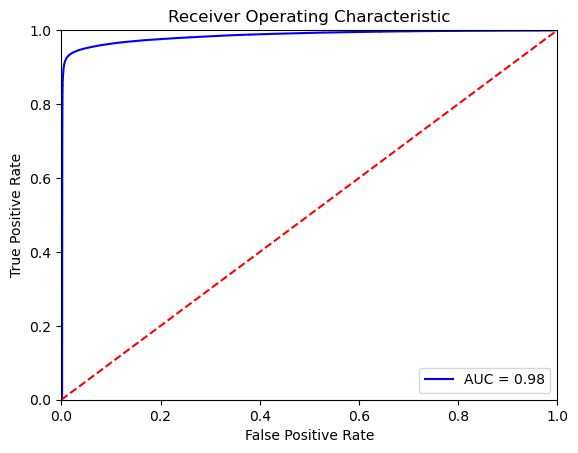

In [502]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()